In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

<b><font color="red" size="6">ch13. 데이터 시각화</font></b>

In [2]:
# 그래프 저장 시 해상도 높게
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 패키지 import
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import seaborn as sns

# 한글설정
plt.rc('font', family='Malgun Gothic')  # 윈도우즈
# plt.rc('font', family='AppleGothic') # Mac 운영체제
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)  # 축의 -(마이너스) 깨짐 방지

# warning(경고메세지) 안 보이게 설정
import warnings
warnings.filterwarnings(action='ignore')

# warning(경고메세지) 보이게 설정
# warnings.filterwarnings(action='default')

# 3절. Seaborn
 - matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
     * 공식사이트 : https://seaborn.pydata.org
     * seaborn API : https://seaborn.pydata.org/api.html
 - Seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.
     1) 데이터 준비 <br>
     2) 미적속성 설정 <br>
     3) 함수를 이용해 그래프 그리기(관계형-수치형, 범주형, 쌍관계, 밀도, 회귀, 다중그래프) <br>
     4) 그래프 출력(show), 저장(savefig)

## 3.1 데이터 준비하기
 - iris, titanic

In [4]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [5]:
iris.info()  # dtype, 전체행수, 열별 결측치를 제외한 데이터 수, 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# 열별 결측치 수
iris.isna().sum()  # axis=0 생략
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris['species'].unique()  # 범주형 데이터들 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
iris.species.value_counts()  # unique 범주형 데이터의 갯수

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [14]:
titanic = sns.load_dataset('titanic')
titanic.head()
# Survived : 0 = 사망, 1 = 생존
# Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석 / 티켓클래스(1, 2, 3)
# Sex : male = 남성, female = 여성
# Age : 나이
# SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
# Parch : 타이타닉 호에 동승한 부모 / 자식의 수
# Fare : 승객 요금
# Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
# class : 티켓클래스(third/second/first)
# embark_town : 탑승도시
# Ticket : 티켓 번호
# Cabin : 방 호수

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# 1. survived 생존 여부 0이면 사망, 1이면 생존
# 2. pclass 객실 등급 1이면 1등급, 2이면 2등급, 3이면 3등급
# 3. sex 성별 male이면 남자, female이면 여자
# 4. age 나이
# 5. sibsp 함께 탑승한 형제 및 배우자 수
# 6. parch 함께 탑승한 자녀 및 부모 수
# 7. fare 요금
# 8. embarked 탑승지 이름 앞글자 C는 Cherbourg, Q는 Queenstown, S는 Southampton
# 9. class 객실 등급 First면 1등급, Second면 2등급, Third면 3등급
# 10. who 남자, 여자, 아이 man, woman, child
# 11. adult_male 성인 남자인지 여부 True면 성인 남자, False면 그외
# 12. deck 선실 번호 첫 알파벳 A, B, C, D, E, F, G
# 13. embark_town 탑승지 이름 Cherbourg, Queenstown, Southampton
# 14. alive 생존여부 no면 사망, yes면 생존
# 15. alone 혼자 탑승했는지 여부 True면 혼자 탑승, False면 가족과 함께 탑승

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3.2 미적 속성 설정하기(style, context , palette, figsize, ...)
### 1) 그래프 스타일 지정
 - 폰트 초기화로 한글설정과 같이 함수 사용 <br>
 plt.rc('font', family='Malgun Gothic')  # 윈도우즈 <br>
 plt.rc('axes', unicode_minus=False)  # 축의 -(마이너스) 깨짐 방지 <br>
 - https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style
 - https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

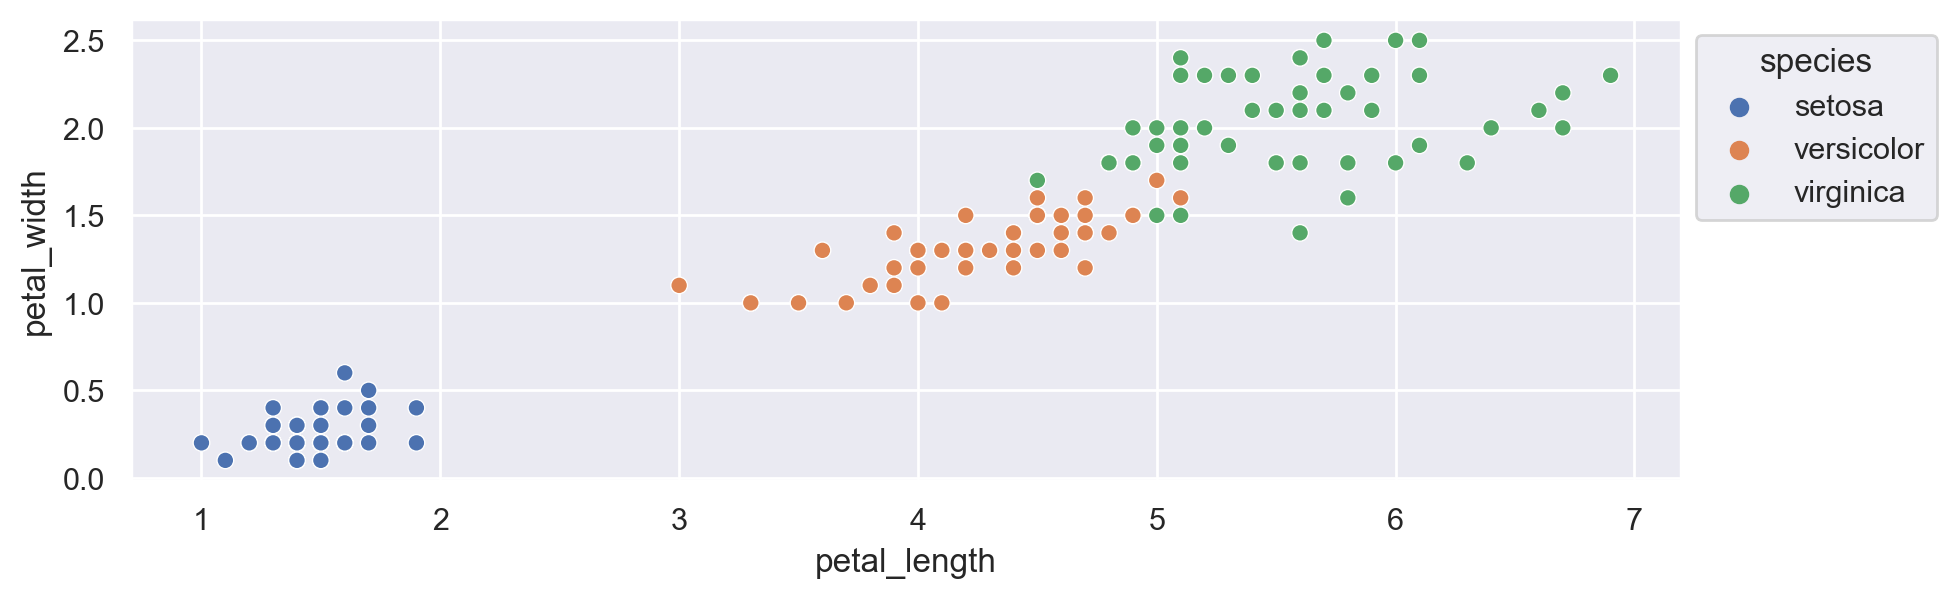

In [32]:
plt.figure(figsize=(10, 3))
sns.set(style='darkgrid')  # white, darkgrid, whitegrid, dark, ticks
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

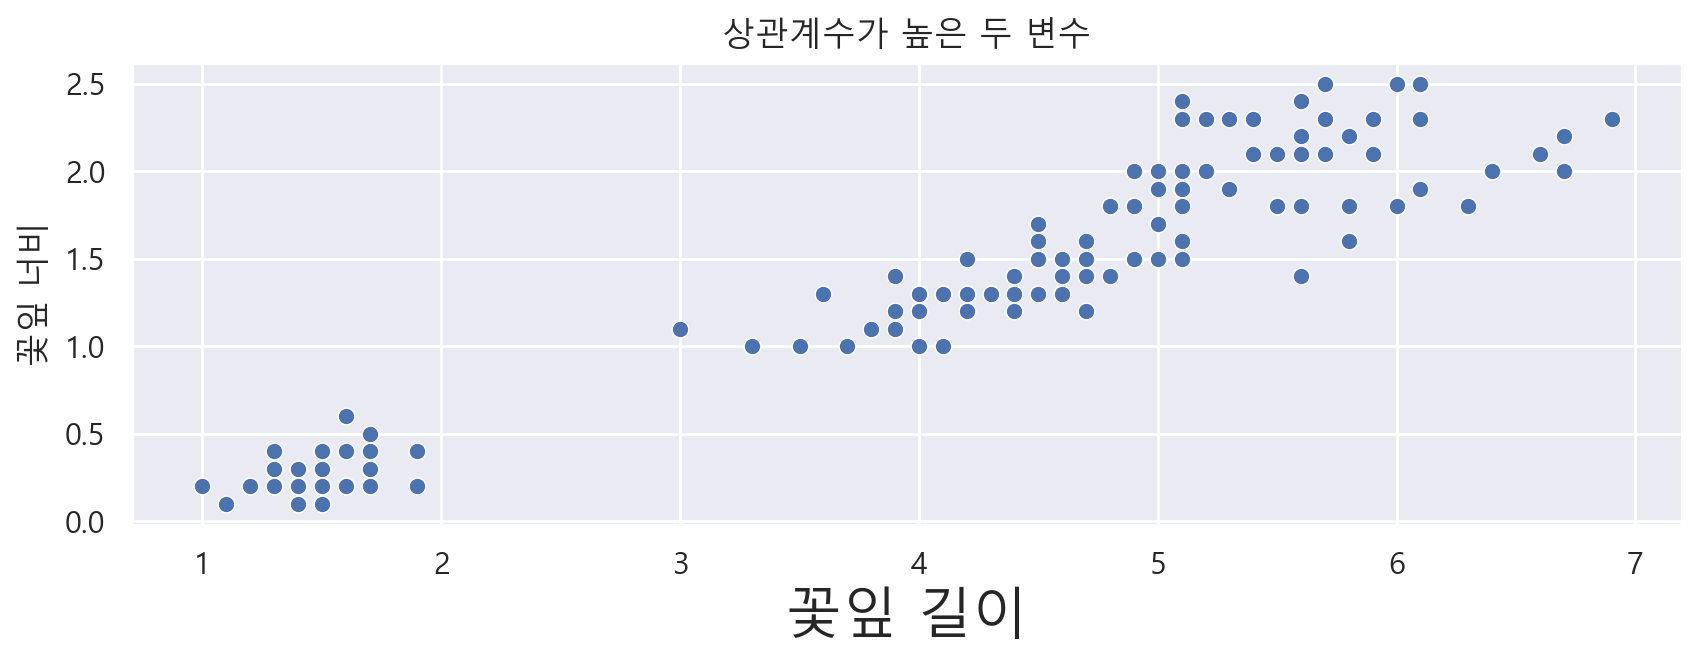

In [36]:
plt.figure(figsize=(10, 3))
sns.set(style='darkgrid')  # white, darkgrid, whitegrid, dark, ticks
# sns.set함수를 수행하면 기존의 설정이 초기화 됨
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 -(마이너스) 깨짐 방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width')
ax.set(title='상관계수가 높은 두 변수', 
       ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', fontsize=20)
plt.show()

### 2) 컨텍스트 지정(배율)

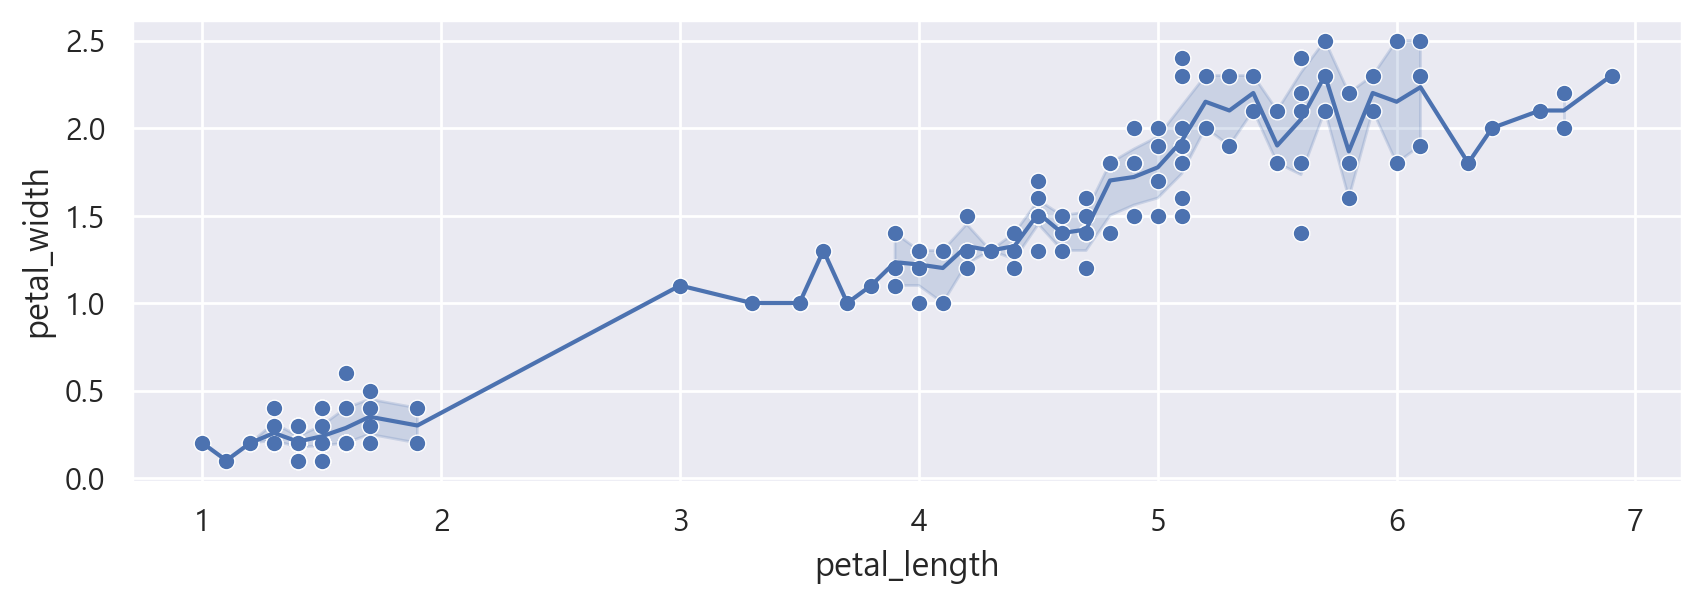

In [41]:
plt.figure(figsize=(10, 3))
# sns.set(context='notebook')  # notebook(기본값 1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context('notebook')
sns.lineplot(data=iris, x='petal_length', y='petal_width')
sns.scatterplot(data=iris, x='petal_length', y='petal_width')
plt.show()

### 3) 컬러 팔레트
 - https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette <br>
 - https://matplotlib.org/tutorials/colors/colormaps.html <br>
 - https://seaborn.pydata.org/tutorial/color_palettes.html <br>

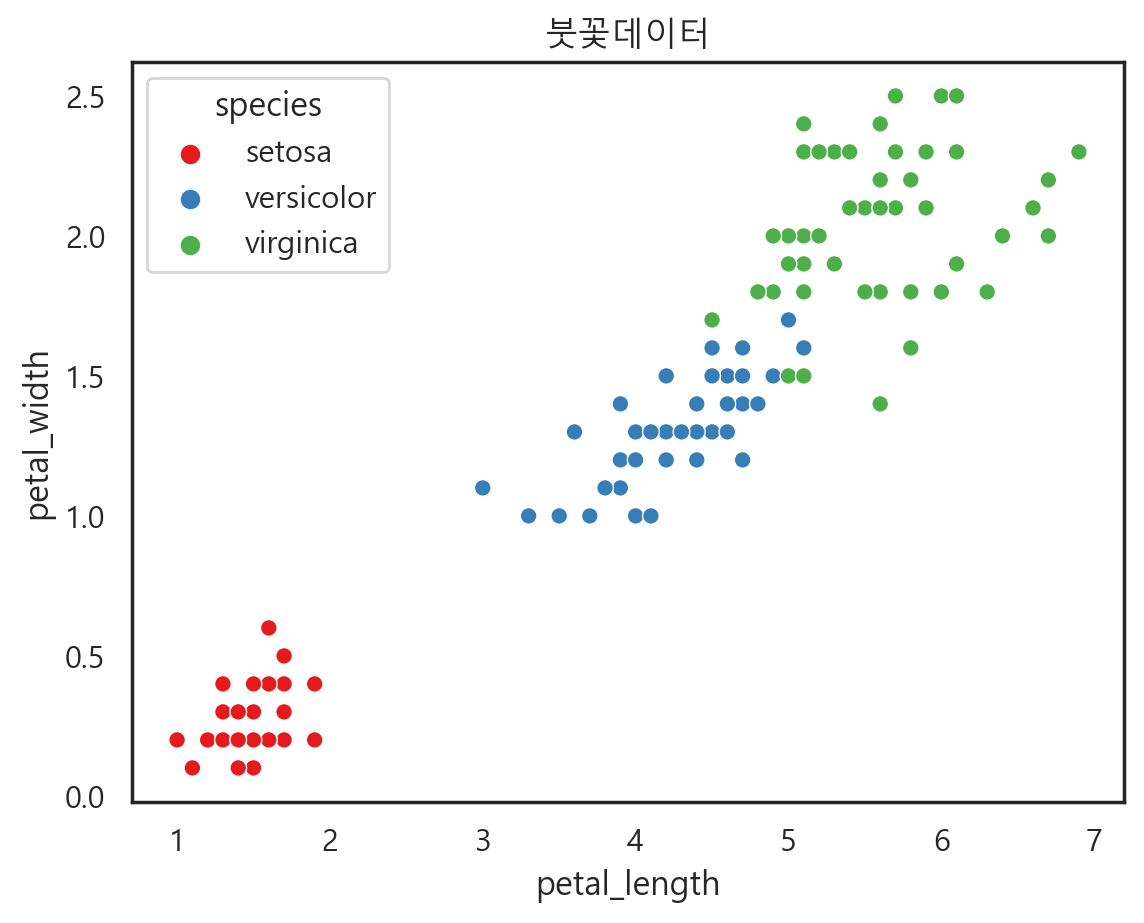

In [53]:
sns.set(palette='Pastel1', style='white', context='notebook')  # 기본 미적 속성 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 -(마이너스) 깨짐 방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='Set1')  # 해당 표만 설정
ax.set_title('붓꽃데이터')
plt.show()

In [55]:
sns.set(style='darkgrid',
        context='notebook',
        palette='Dark2',
        rc={'figure.figsize': (10, 3)})

## 3.3 Seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
    * scatterplot, lineplot, relplot(서브플롯제공)

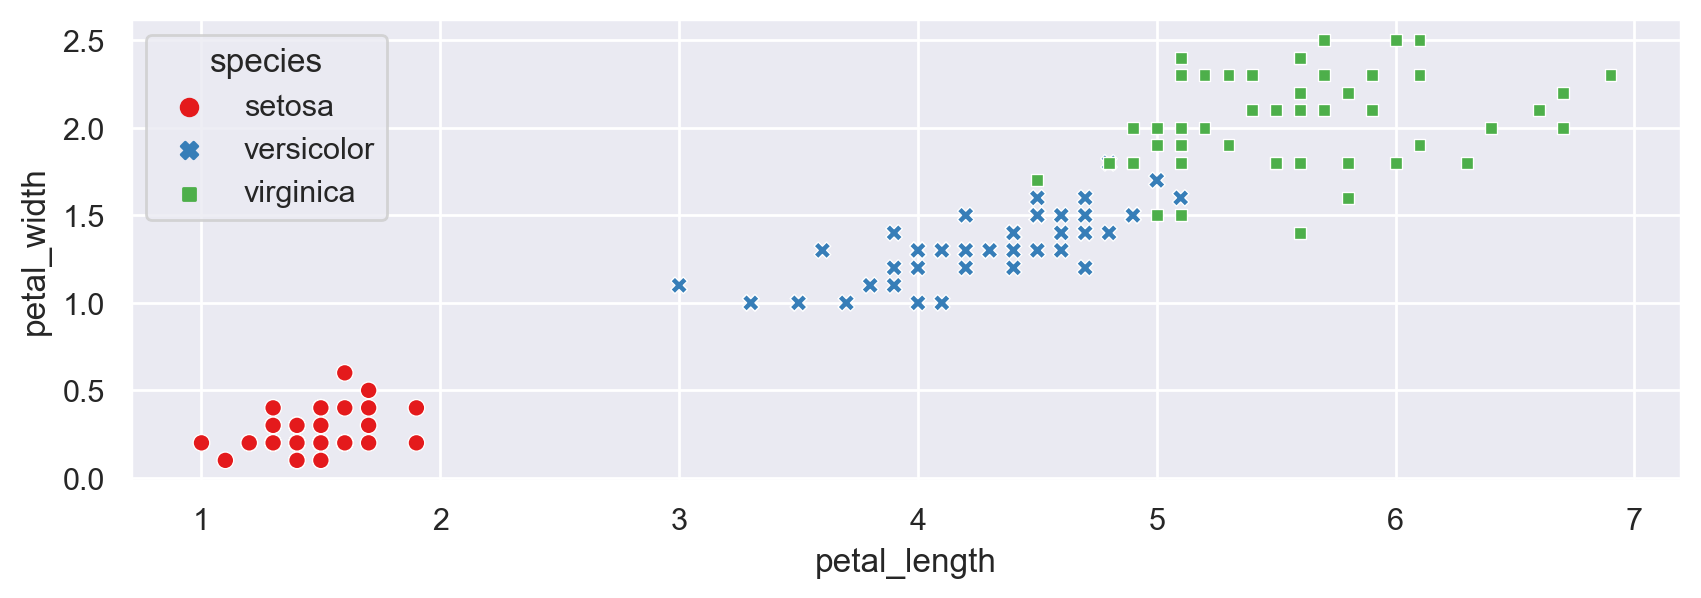

In [56]:
# 종별 다른 색상과 다른 스타일의 scatterplot
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='Set1', style='species')
plt.show()

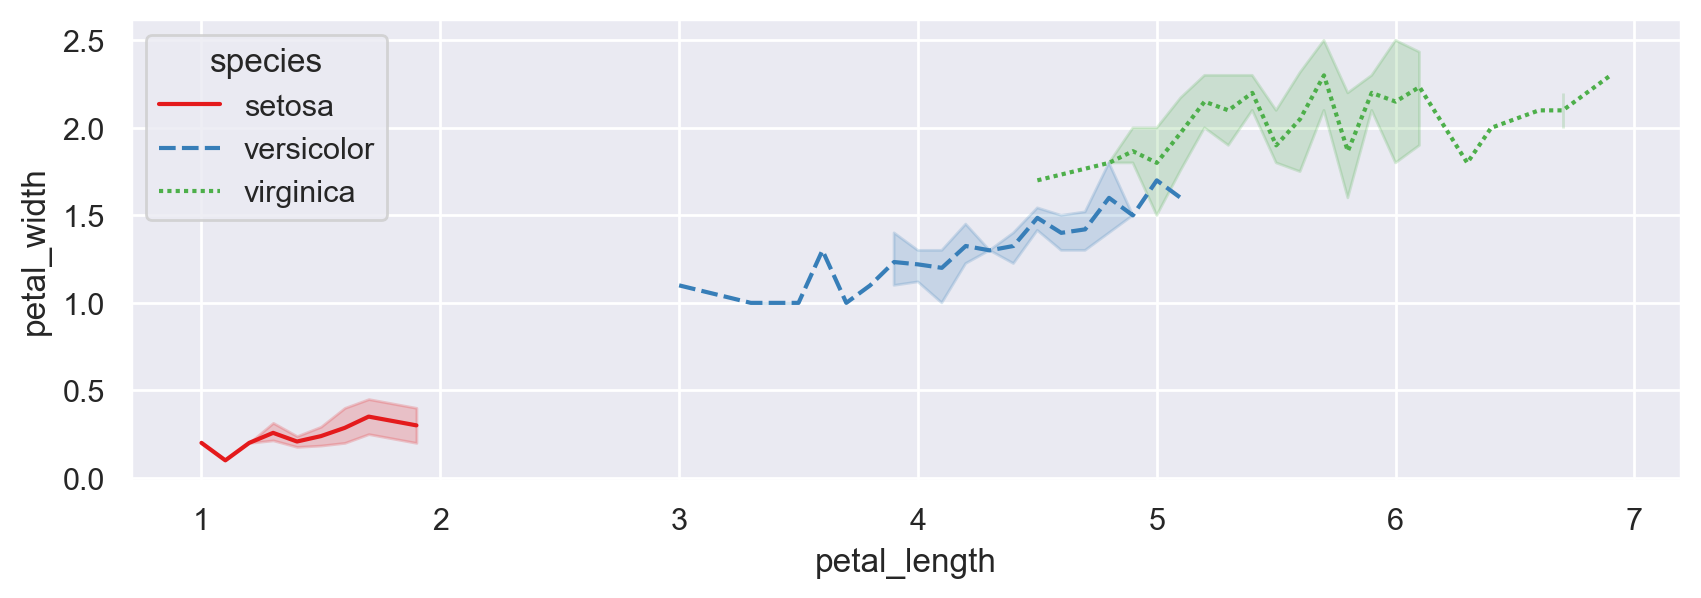

In [61]:
# 종별 다른 색상과 스타일의 lineplot 그리기
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', style='species', palette='Set1')
plt.show()

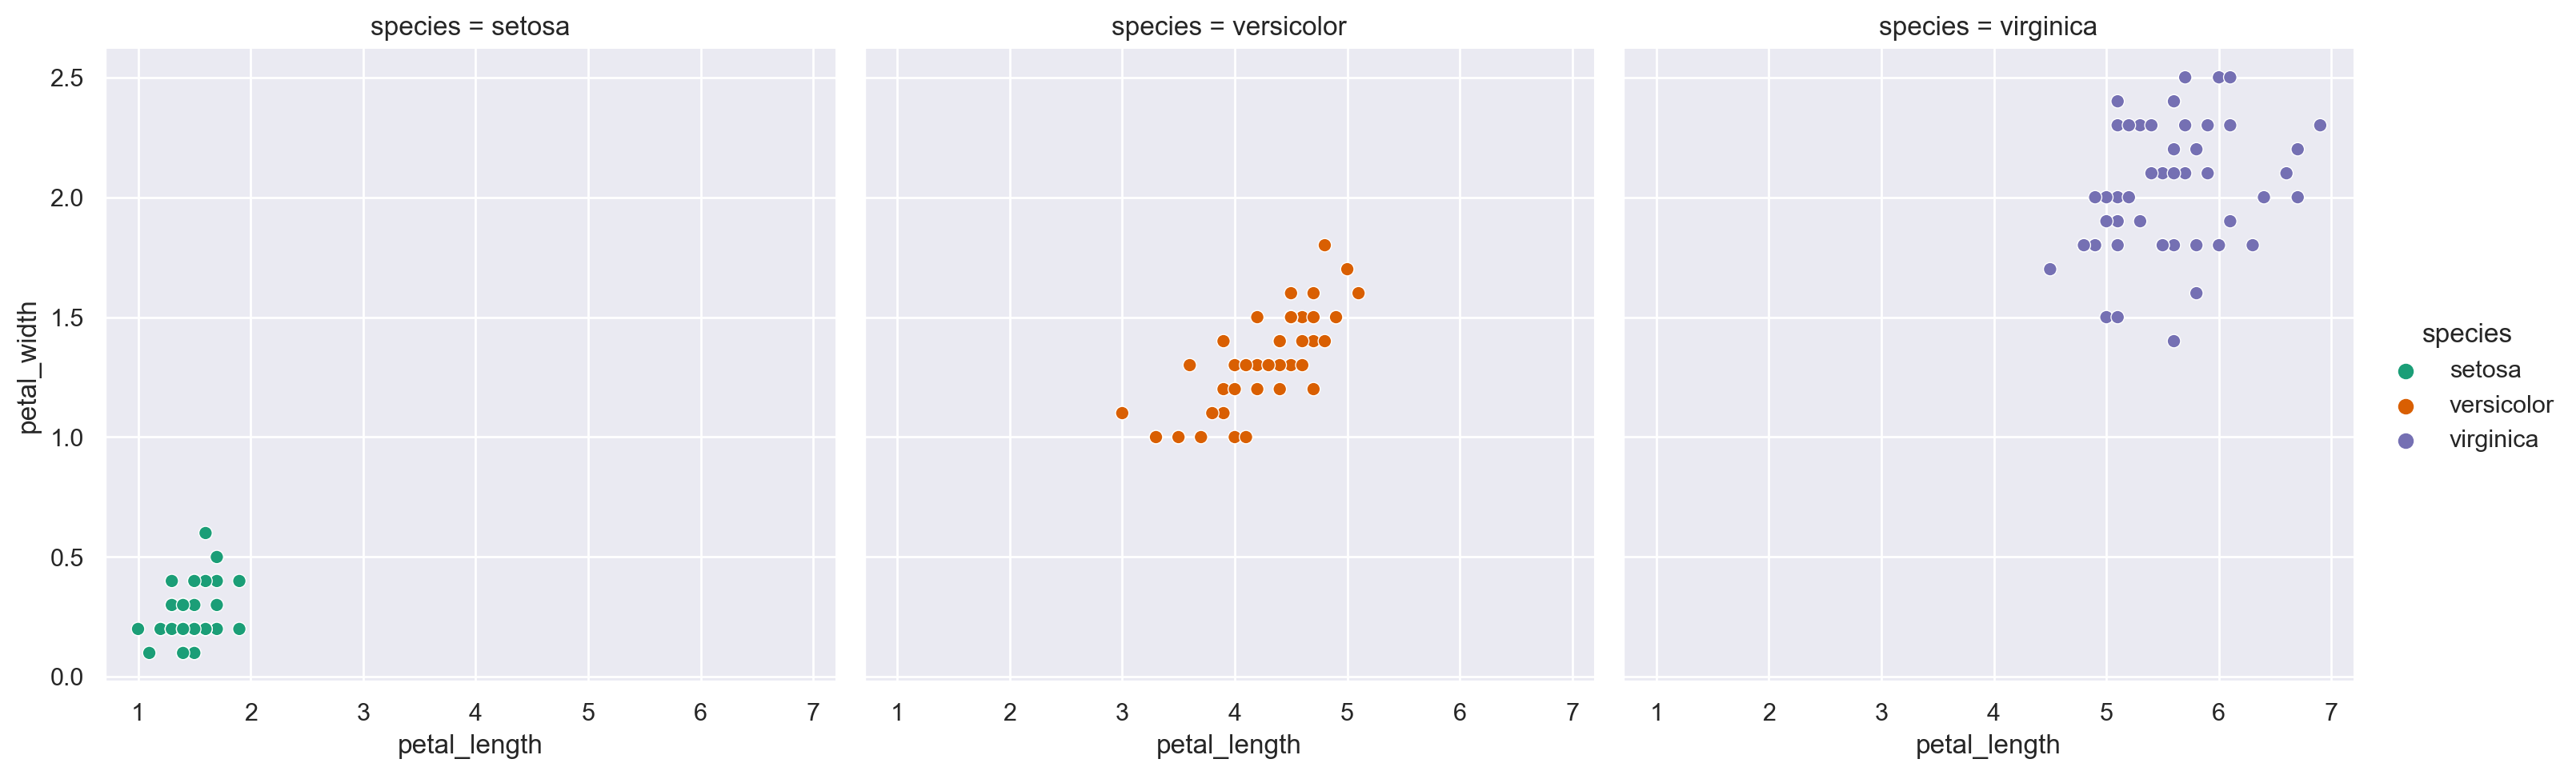

In [67]:
# 종별 lineplot을 서브플롯으로 => relplot(관계형 그래프에서 서브플롯 그리는 함수)
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species', 
            # kind='line',  # 서브플롯으로 그려질 그래프 종류(기본값:scatter)
            col='species',  # column단위로 서브플롯 표현
            # col_wrap=2,  # 한 줄에 표현될 서브플롯 수
           )
plt.show()

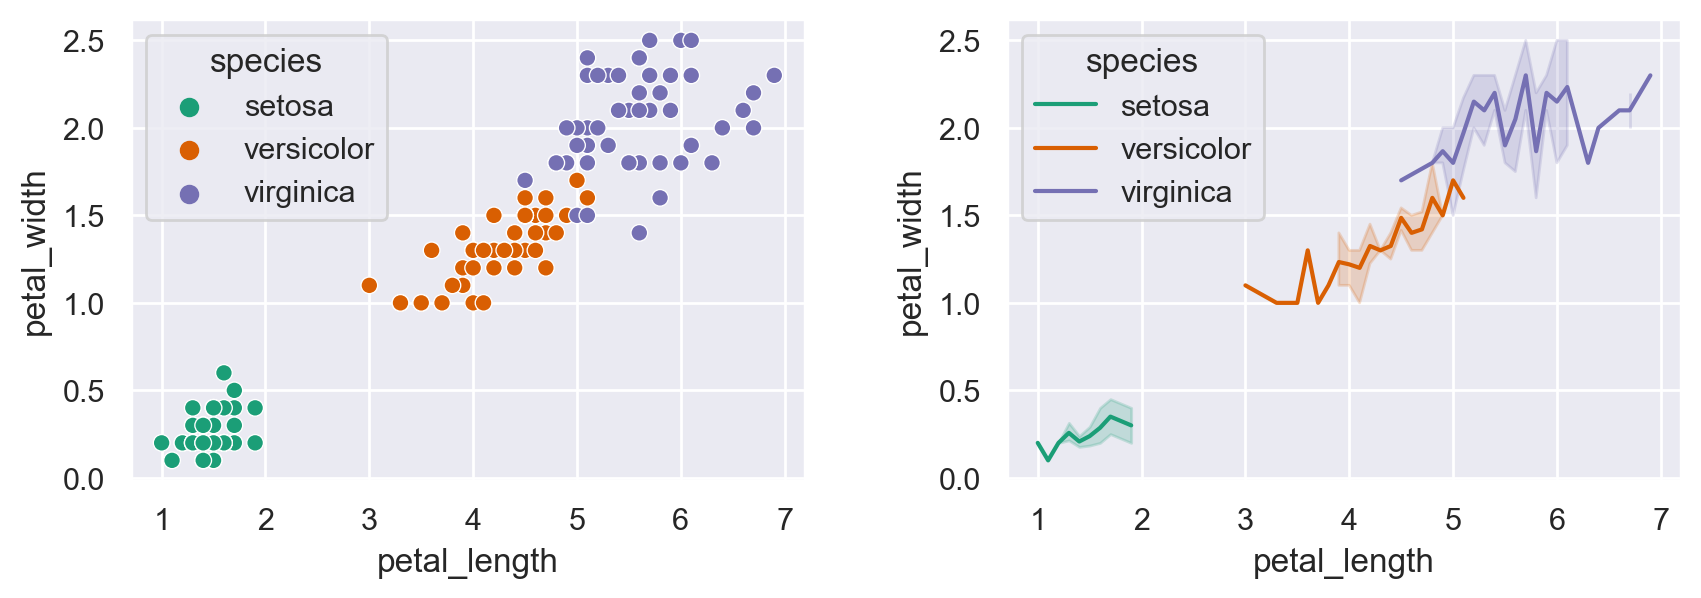

In [72]:
# ax[0]에는 산점도, ax[1]에는 lineplot
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0.3)  # 서브플롯 사이의 공백(여백) 조정
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[0])
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[1])
plt.show()

### 2) 범주형 그래프
 - stripplot, swarmplot, barplot, barhplot, countplot, pointplot, 
 - boxplot, violinplot, boxenplot => catplot(서브플롯)

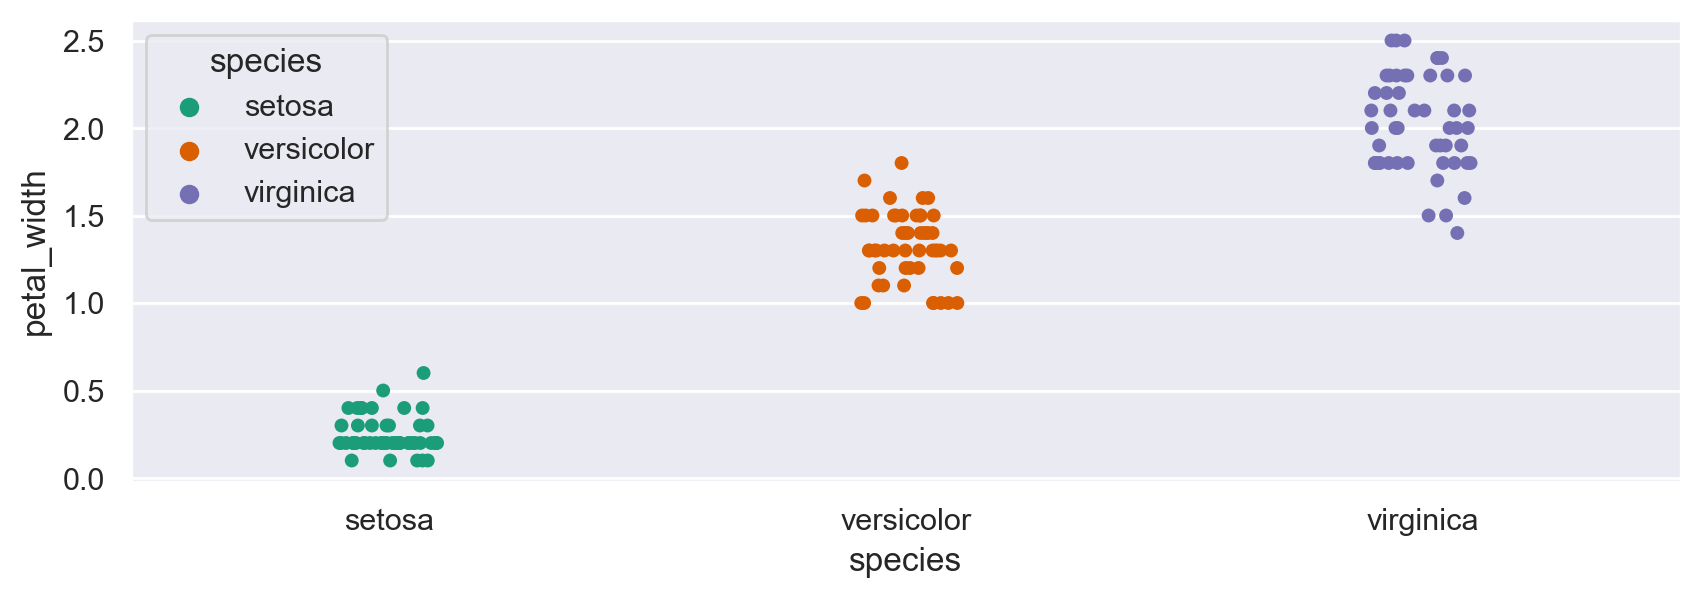

In [76]:
# x축이 범주형일 때의 산점도(중첩된 점)
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
# hue 속성이 있을 경우 palette 지정 가능
plt.show()

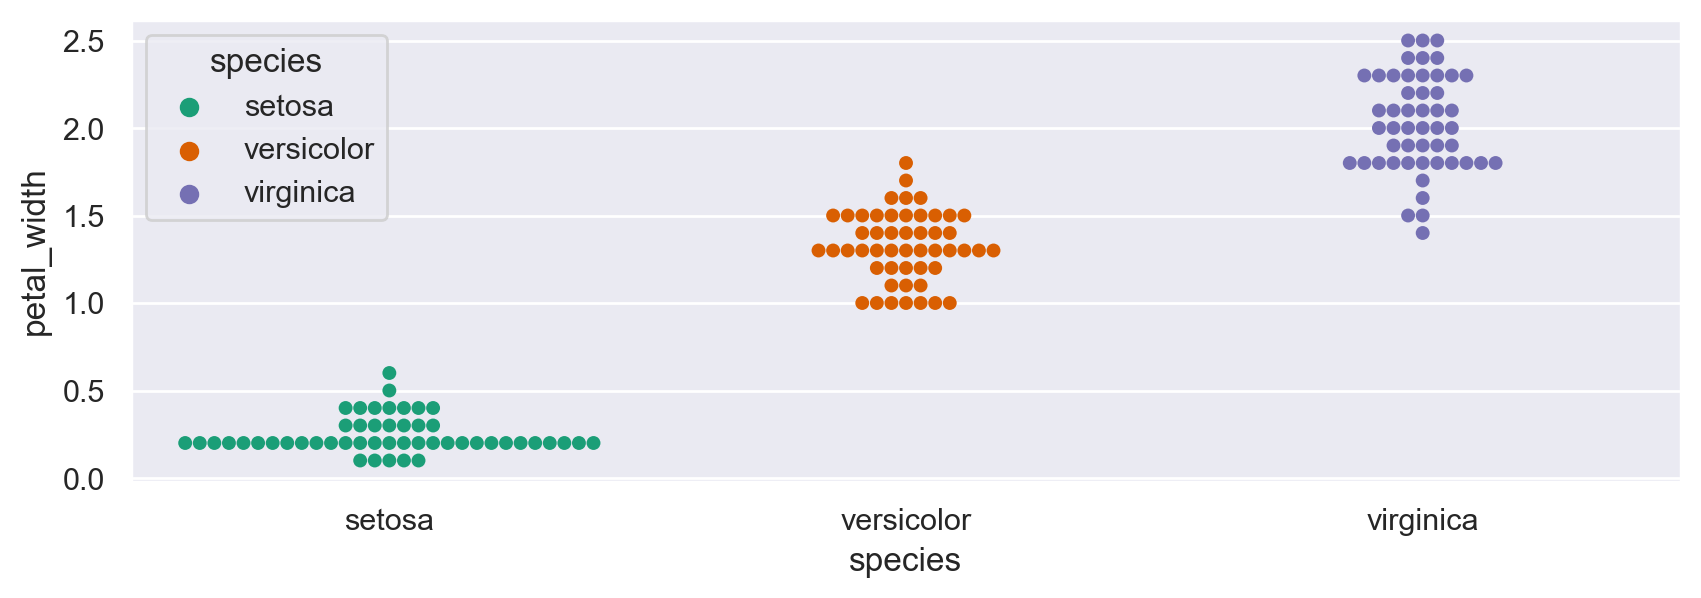

In [79]:
# x축이 범주형일 때의 산점도(중첩되지 않은 점)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

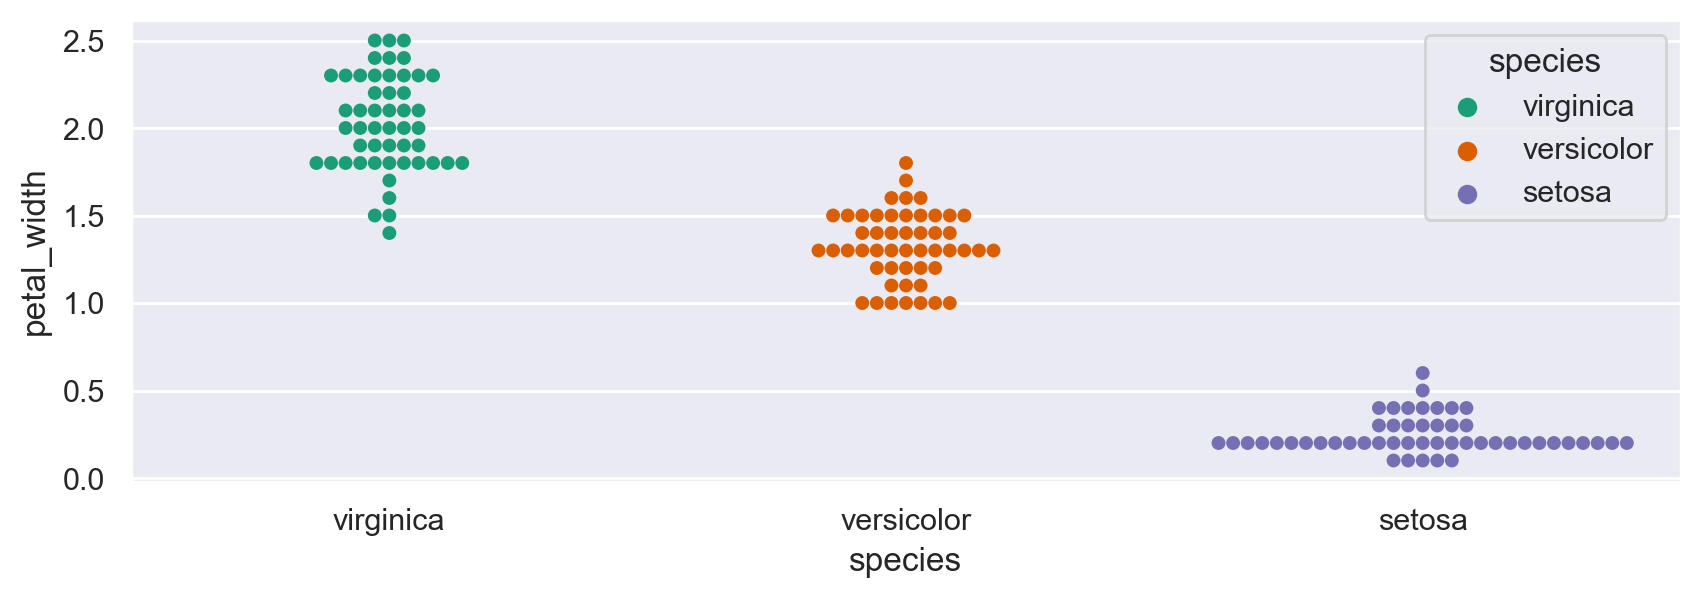

In [81]:
# 내림차순 정렬된 iris 데이터 범주형 산점도
sns.swarmplot(data=iris.sort_values('petal_width', ascending=False),
              x='species', y='petal_width', hue='species')
plt.show()

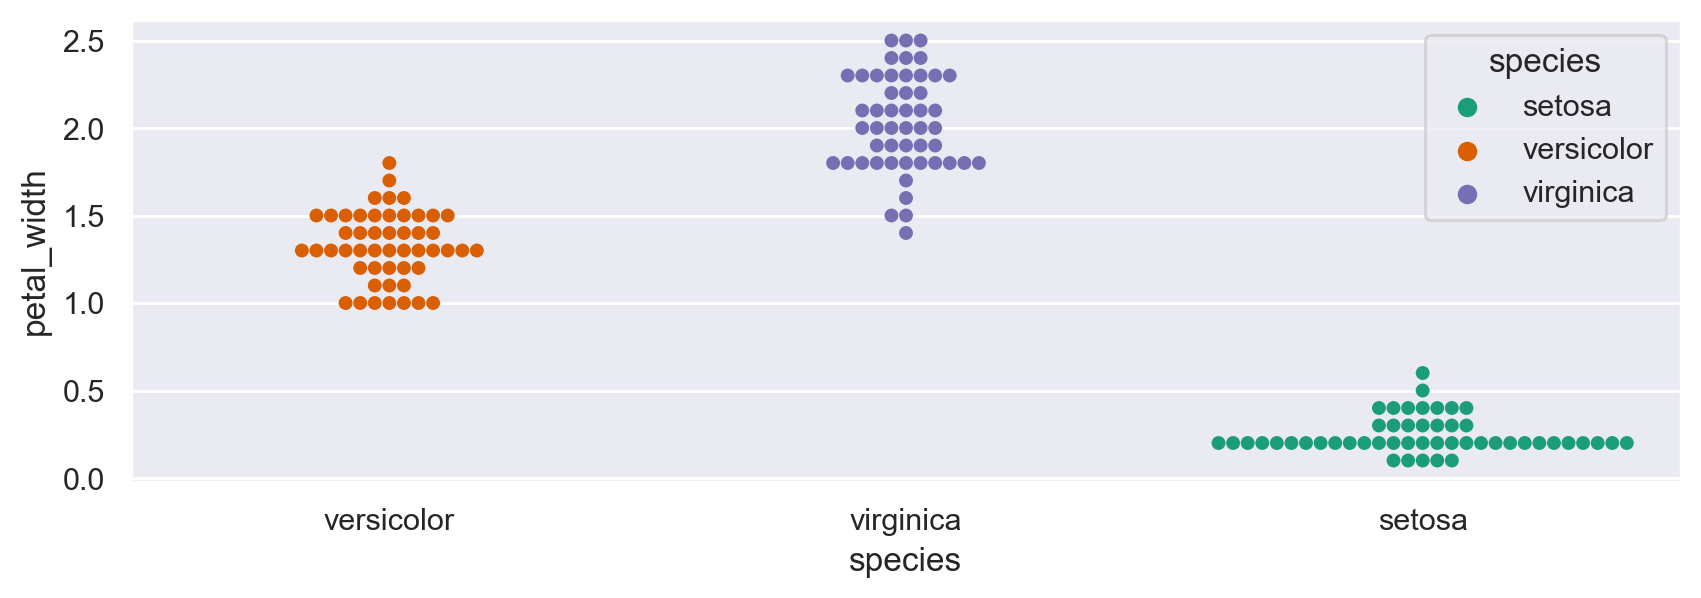

In [82]:
# 산점도의 x축 순서를 임의로 정할 수 있음
sns.swarmplot(data=iris,
              x='species', y='petal_width', hue='species',
              order=['versicolor', 'virginica', 'setosa'])
plt.show()

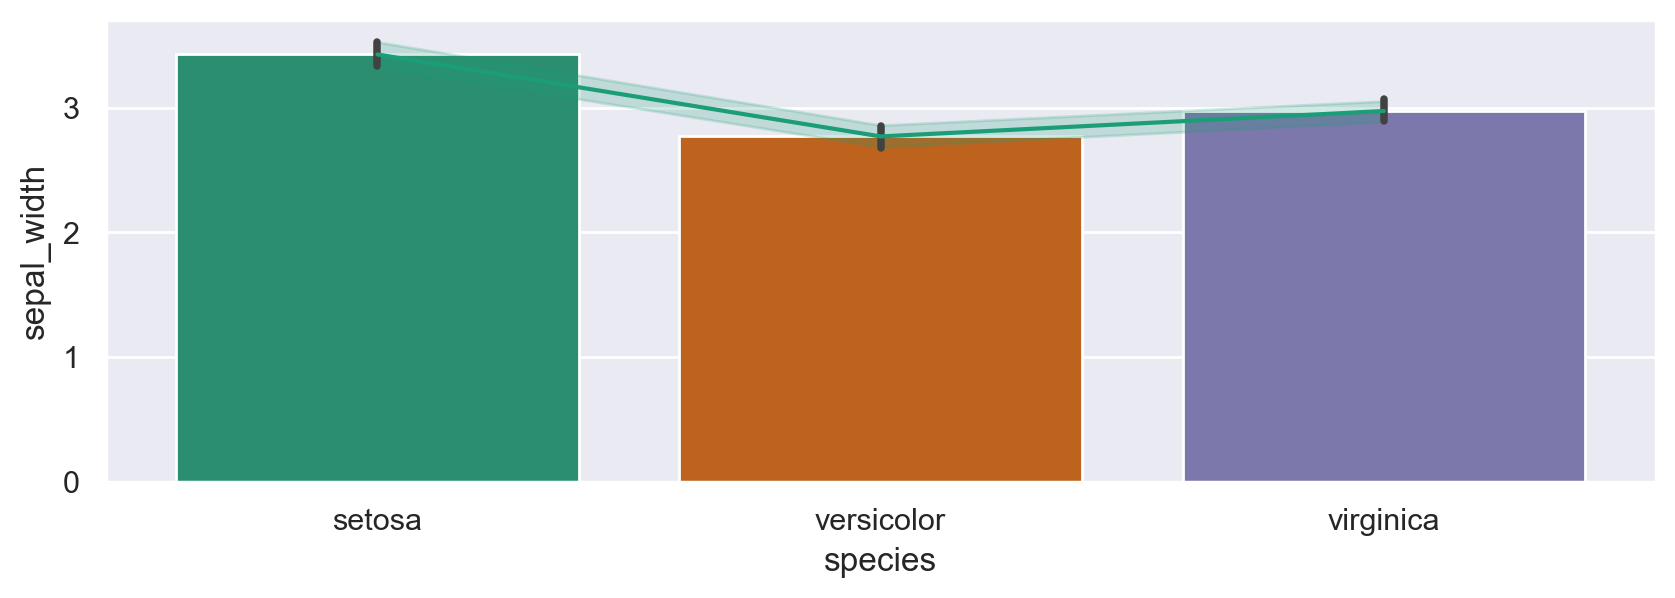

In [88]:
# barplot : 각 변주별 평균값과 그에 대한 신뢰구간
#           신뢰구간 제외 : ci(confidece interval=None, erorrbar= None
sns.barplot(data=iris, x='species', y='sepal_width', 
            # erorrbar= None
           )
sns.lineplot(data=iris, x='species', y='sepal_width')
plt.show()

<Axes: xlabel='sex', ylabel='survived'>

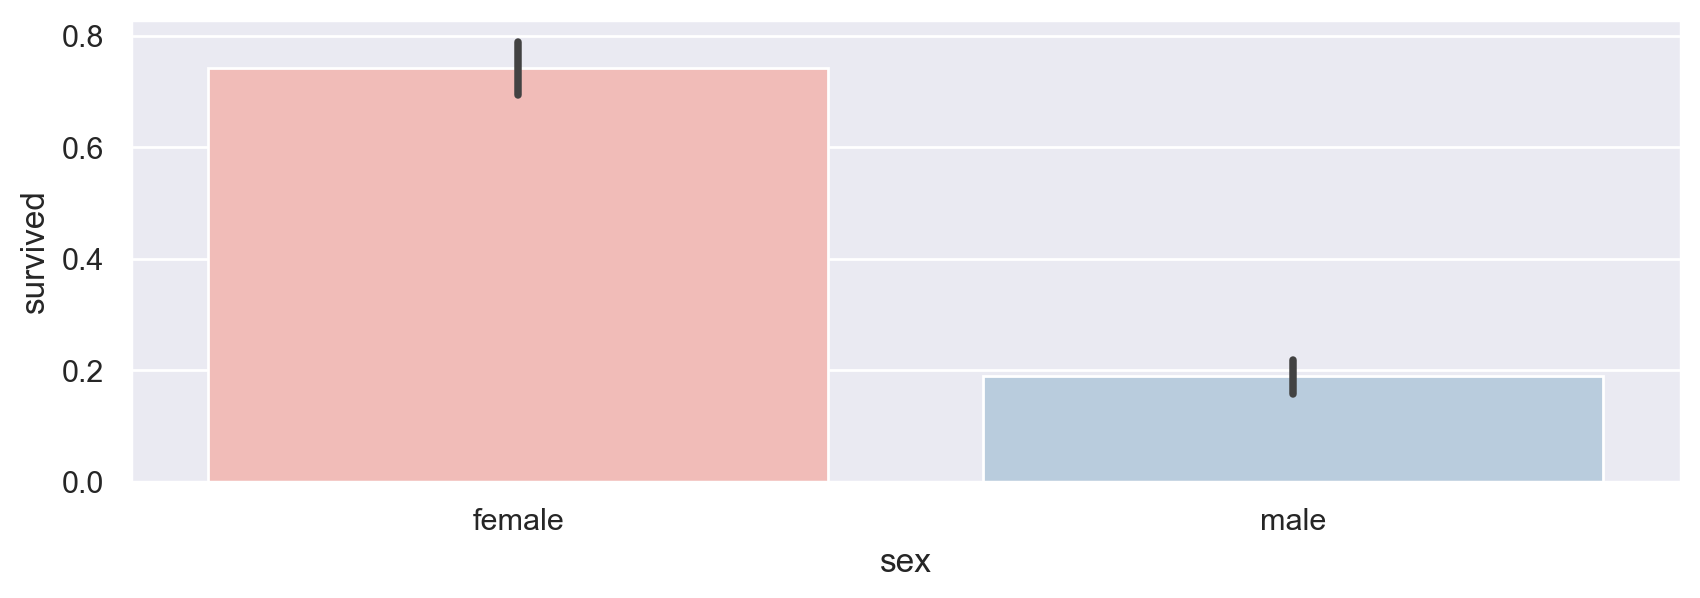

In [91]:
# 성별 servived의 평균을 막대그래프로 만ㄹ기
sns.barplot(data=titanic, x='sex', y='survived', 
            order=['female', 'male'],
            palette='Pastel1')

In [92]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='sex', ylabel='survived'>

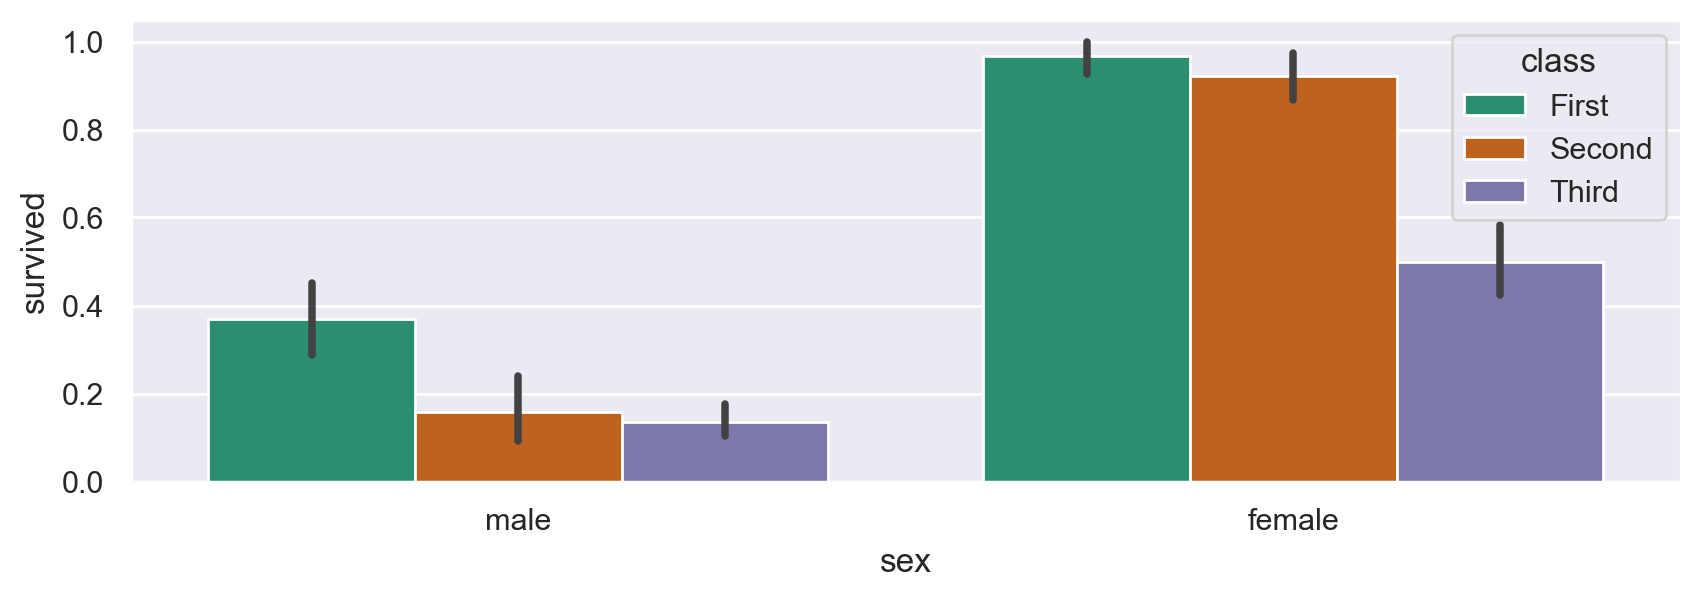

In [93]:
# class별로 성별 생존률을 하나의 막대그래프로 생성하기
sns.barplot(data=titanic, x='sex', y='survived', hue='class')

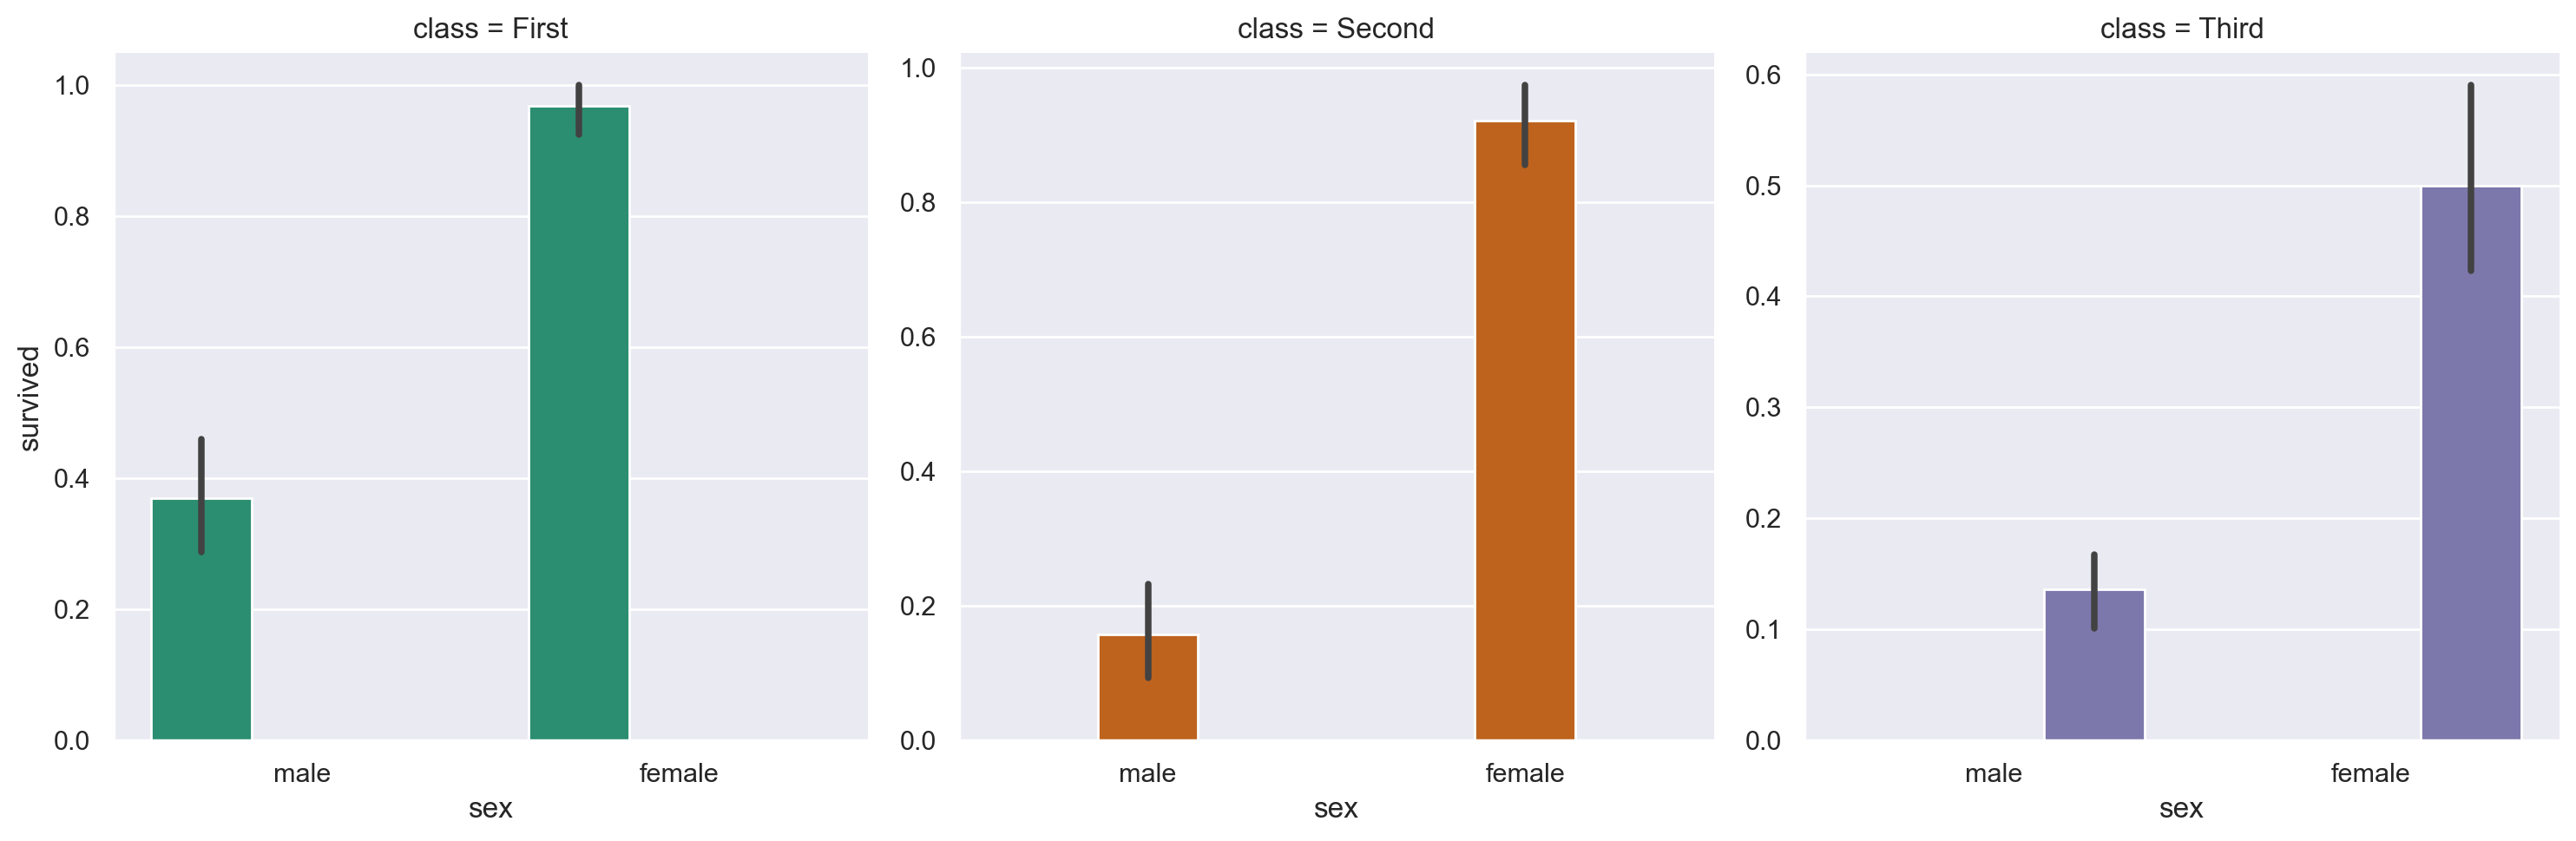

In [96]:
# class별로 성별 생존률을 서브플롯(막대그래프)으로 생성하기
sns.catplot(data=titanic, x='sex', y='survived', hue='class', 
            kind='bar',  # 기본값  stripplot
            col='class',  # col 단위로 서브플롯 표현
            sharey=False
            # col_wrap=2  # 기본값은 한 행에 모든 서브플롯 표현
           )

In [98]:
titanic.deck.unique()  # 데이터 종류들

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [124]:
titanic.deck.value_counts()  # 범주별 데이터 갯수

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<Axes: xlabel='deck', ylabel='count'>

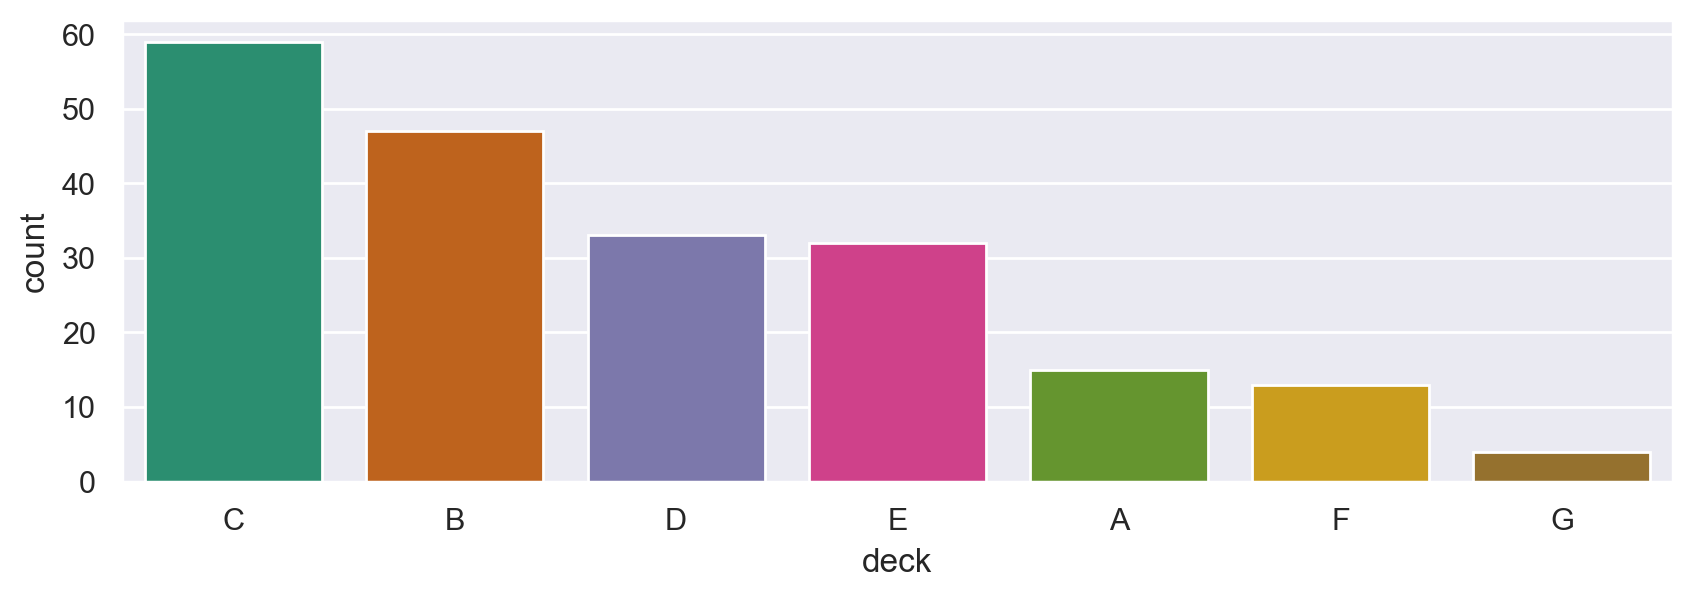

In [128]:
result = titanic.deck.value_counts()
# result.index
# deck별 관측수(내림차순 정렬)를 막대그래프 (countplot)
sns.countplot(data=titanic, x='deck', order=result.index)

<Axes: xlabel='deck', ylabel='count'>

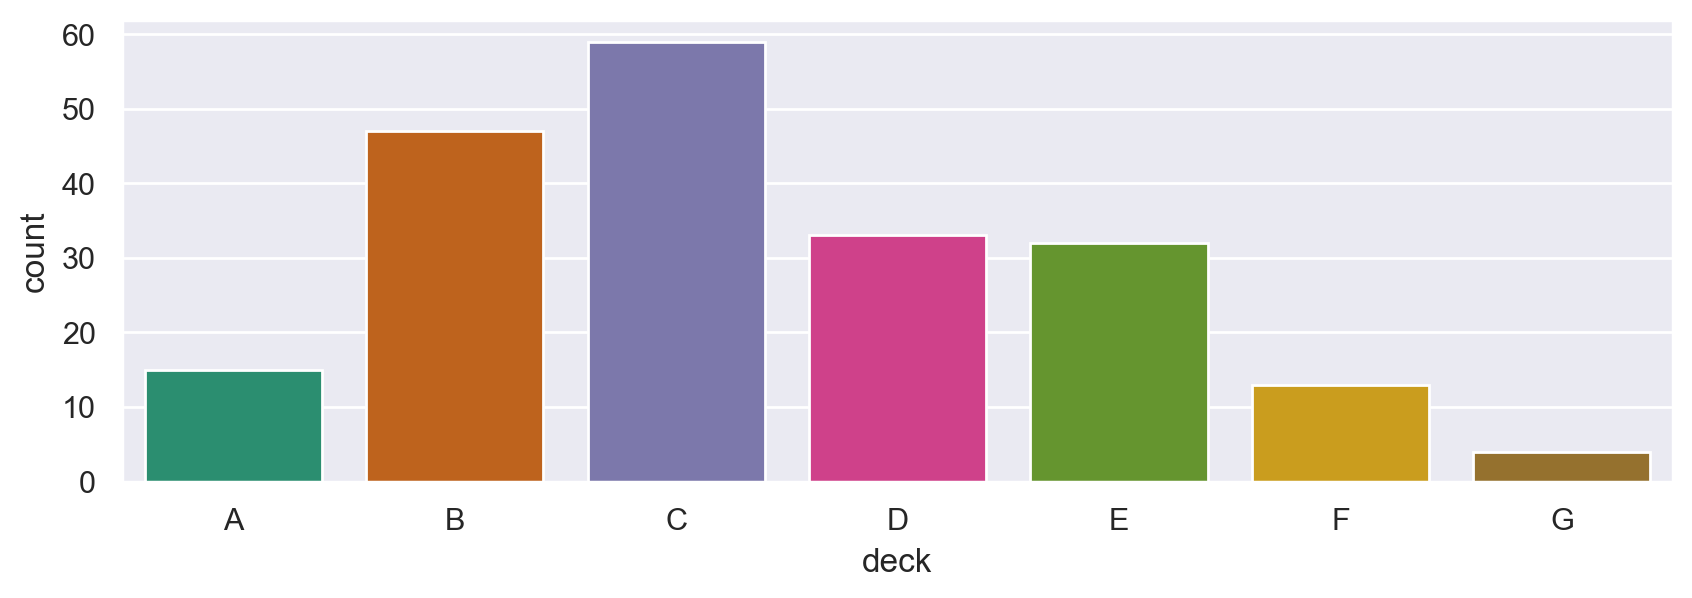

In [106]:
# deck별 관측수를 막대그래프 (countplot)
sns.countplot(data=titanic, x='deck')

<Axes: xlabel='class', ylabel='survived'>

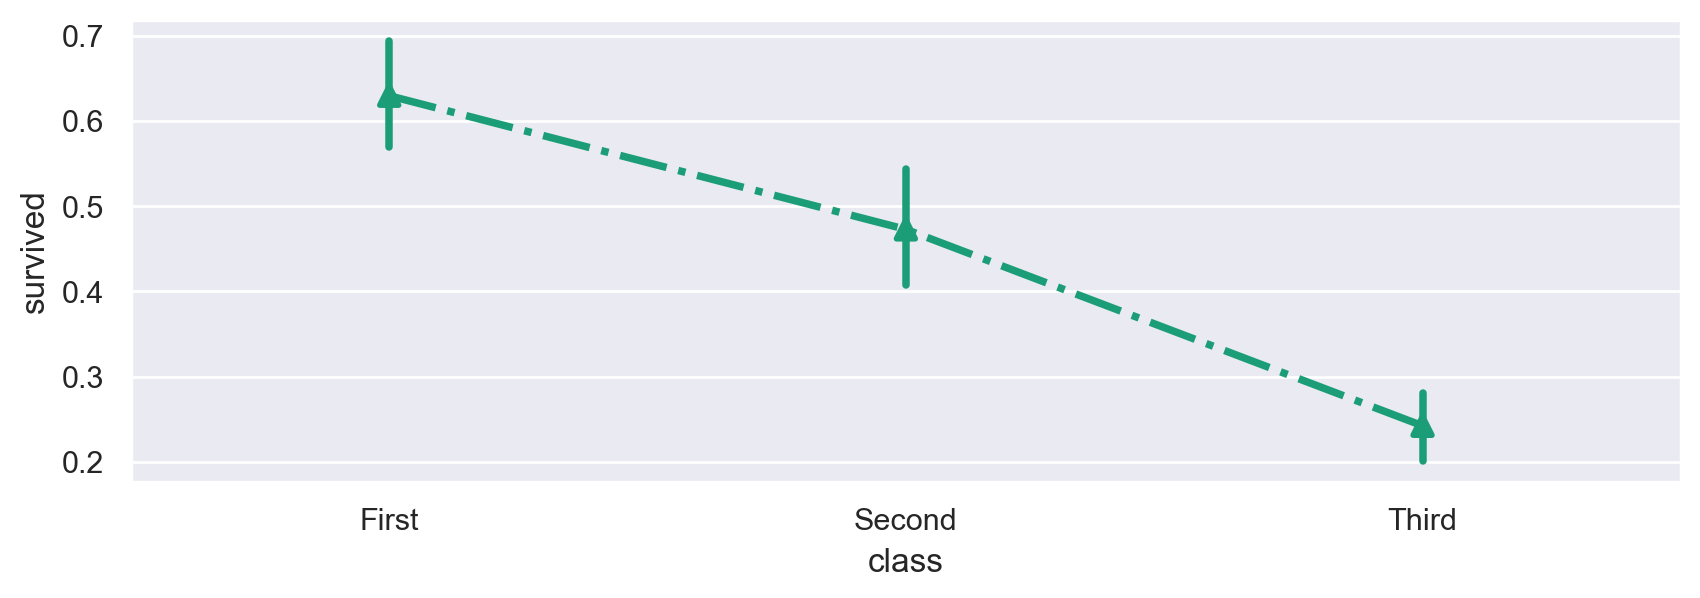

In [118]:
# class별로 survived 값을 pointplot
sns.pointplot(data=titanic, x='class', y='survived', 
              markers=['^'],
              linestyles=['-.'])

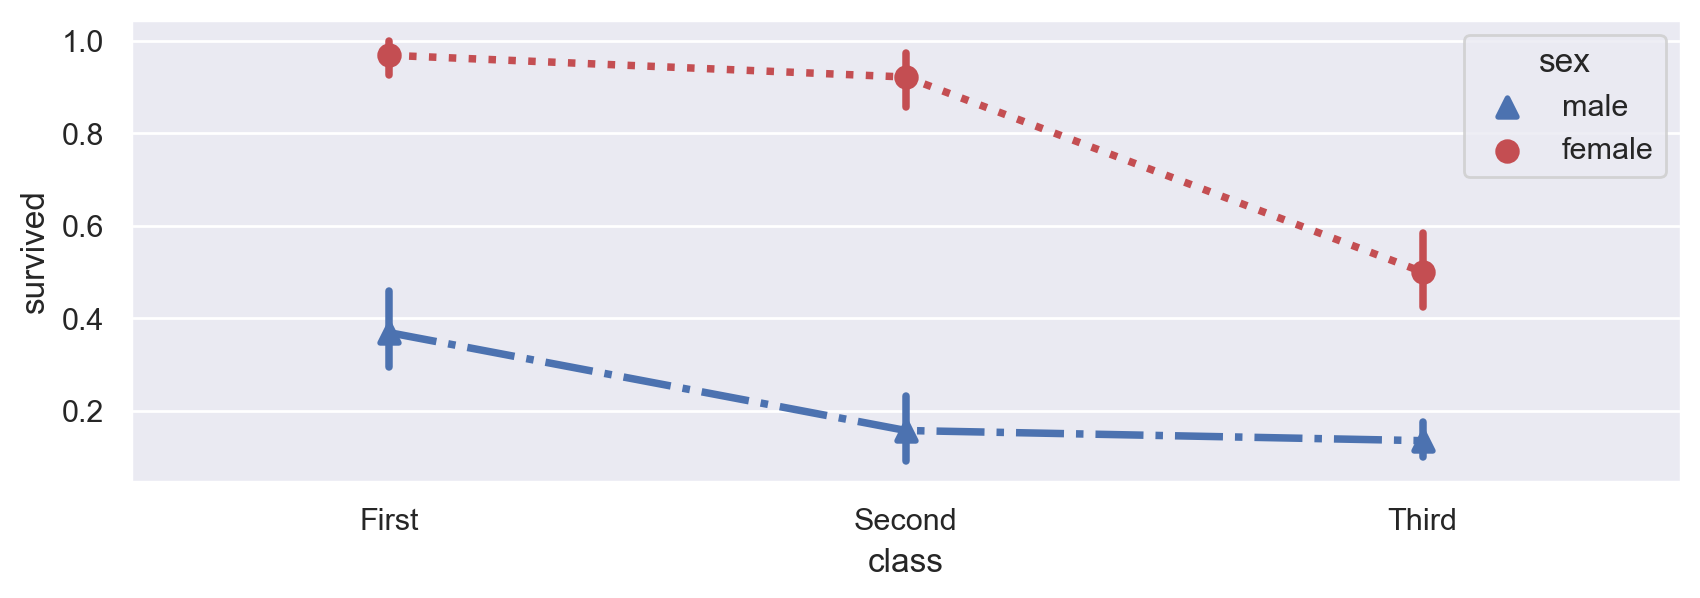

In [122]:
# class별, 성별로 survived 값을 pointplot
sns.pointplot(data=titanic, x='class', y='survived', hue='sex',
              markers=['^', 'o'],
              linestyles=['-.', ':'],
              palette={'male' : 'b', 'female' : 'r'})
plt.show()

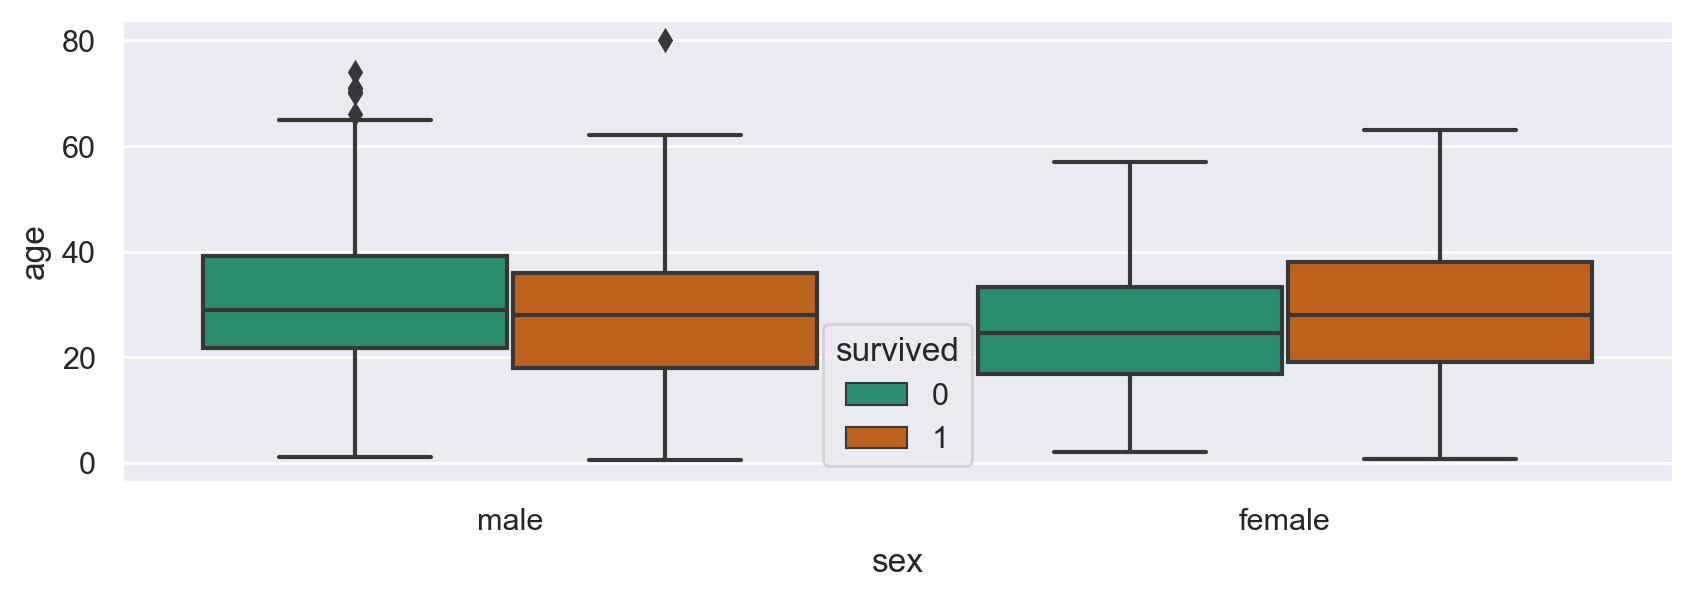

In [131]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

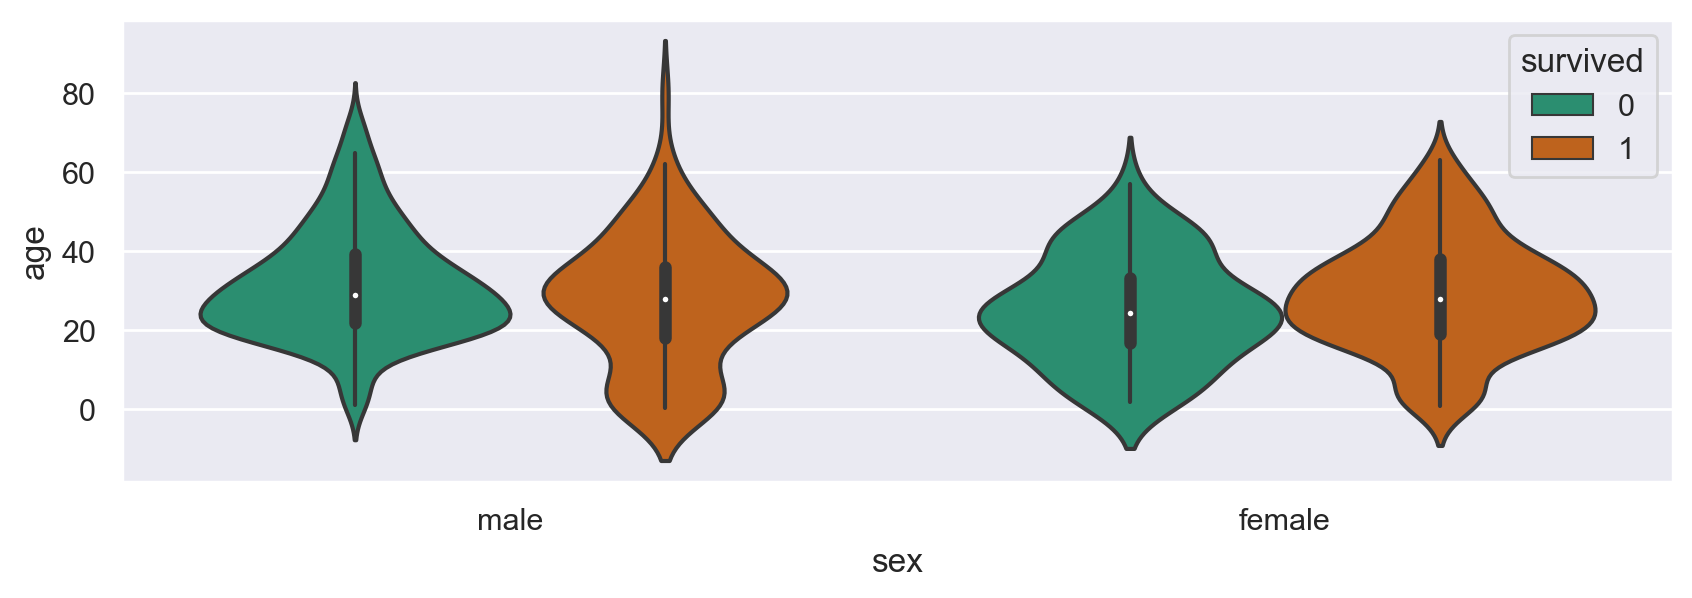

In [132]:
sns.violinplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

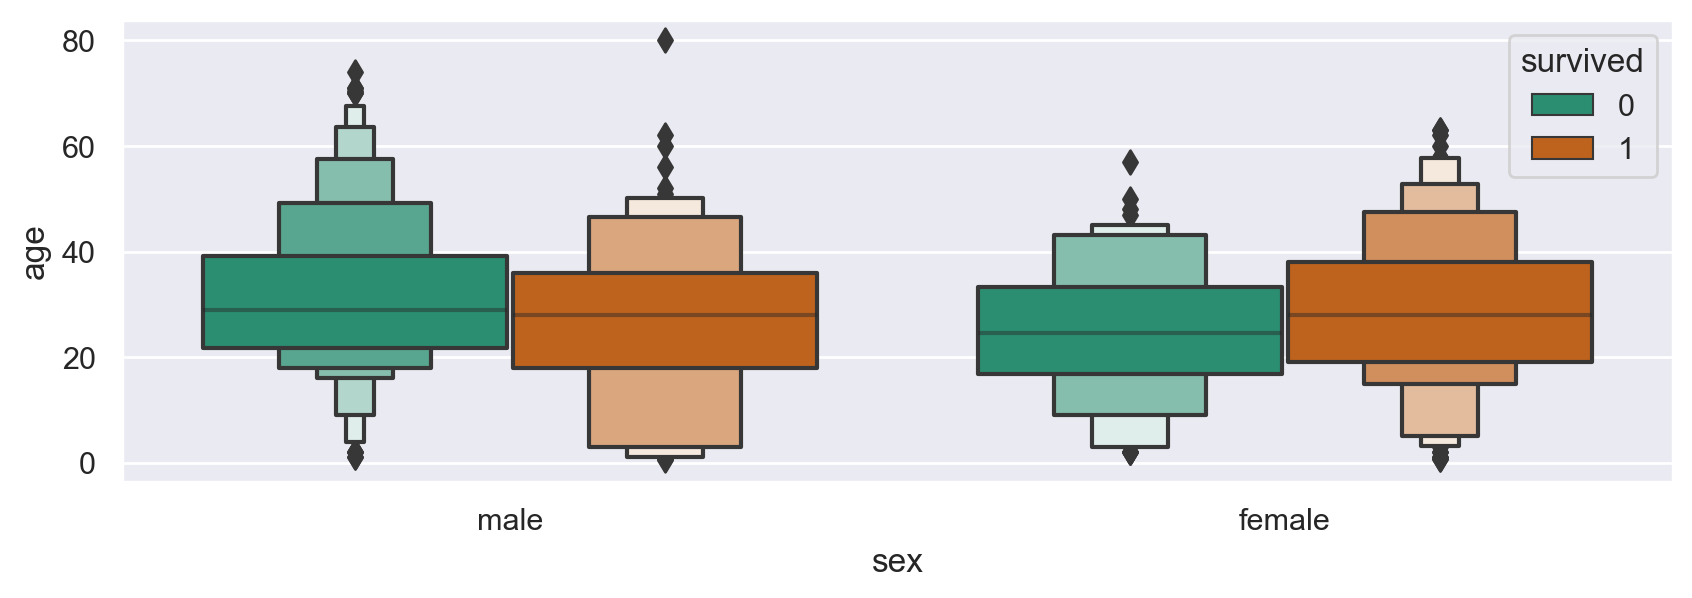

In [133]:
sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

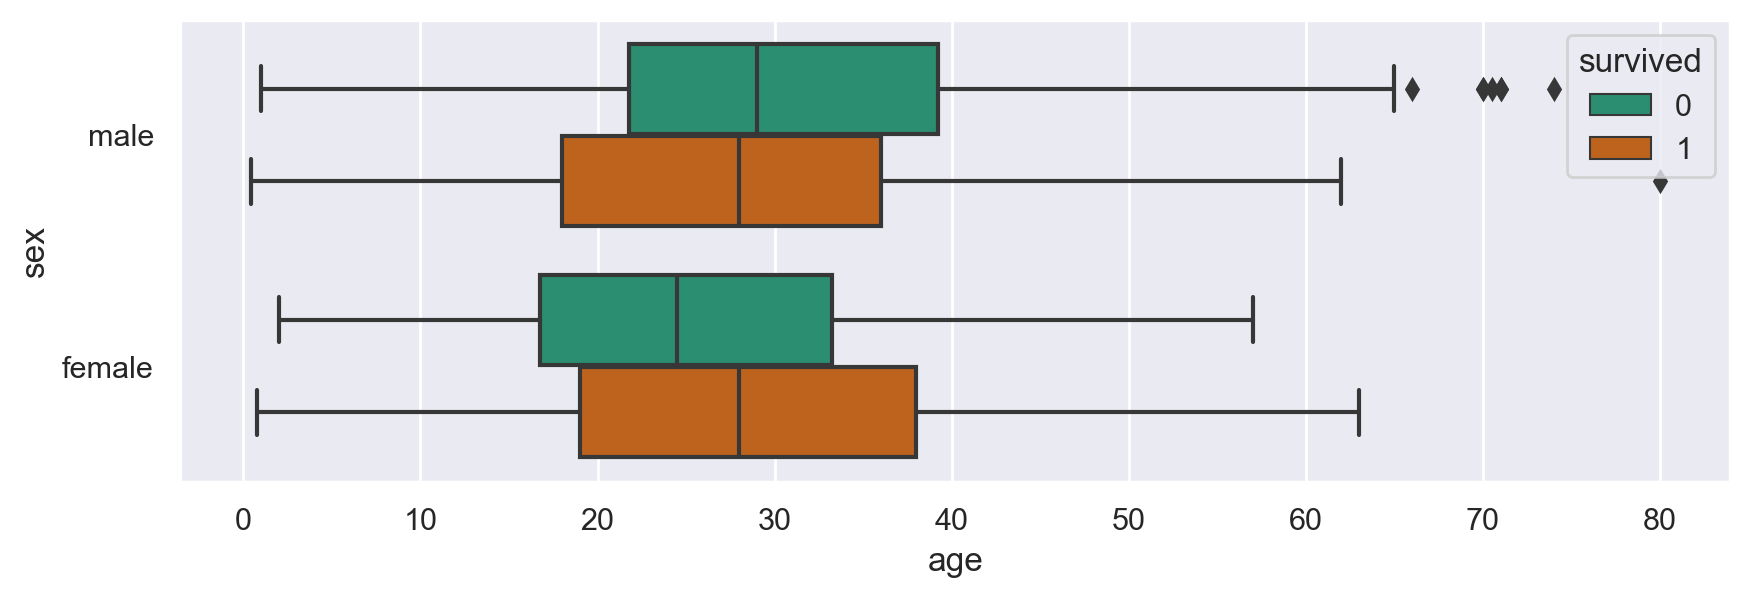

In [134]:
sns.boxplot(data=titanic, y='sex', x='age', hue='survived')
plt.show()

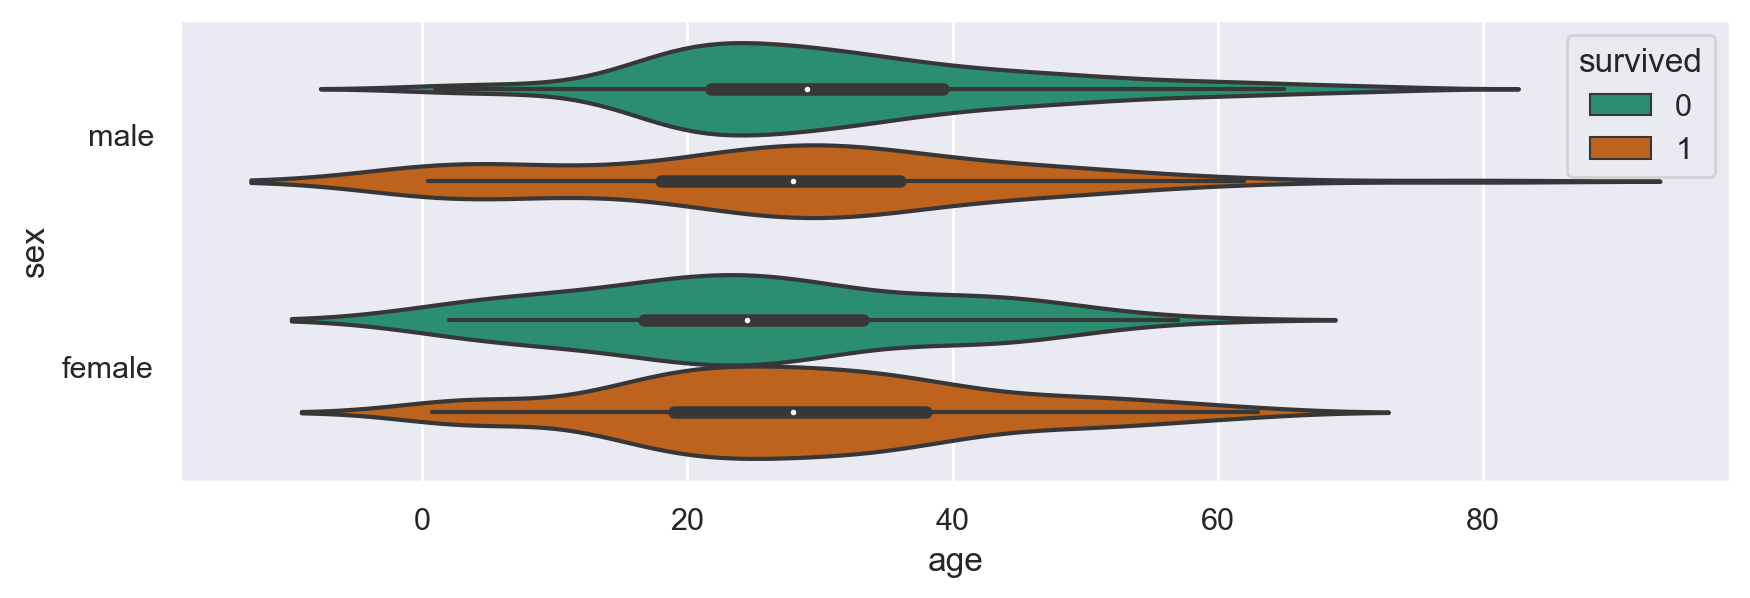

In [136]:
sns.violinplot(data=titanic, y='sex', x='age', hue='survived')
plt.show()

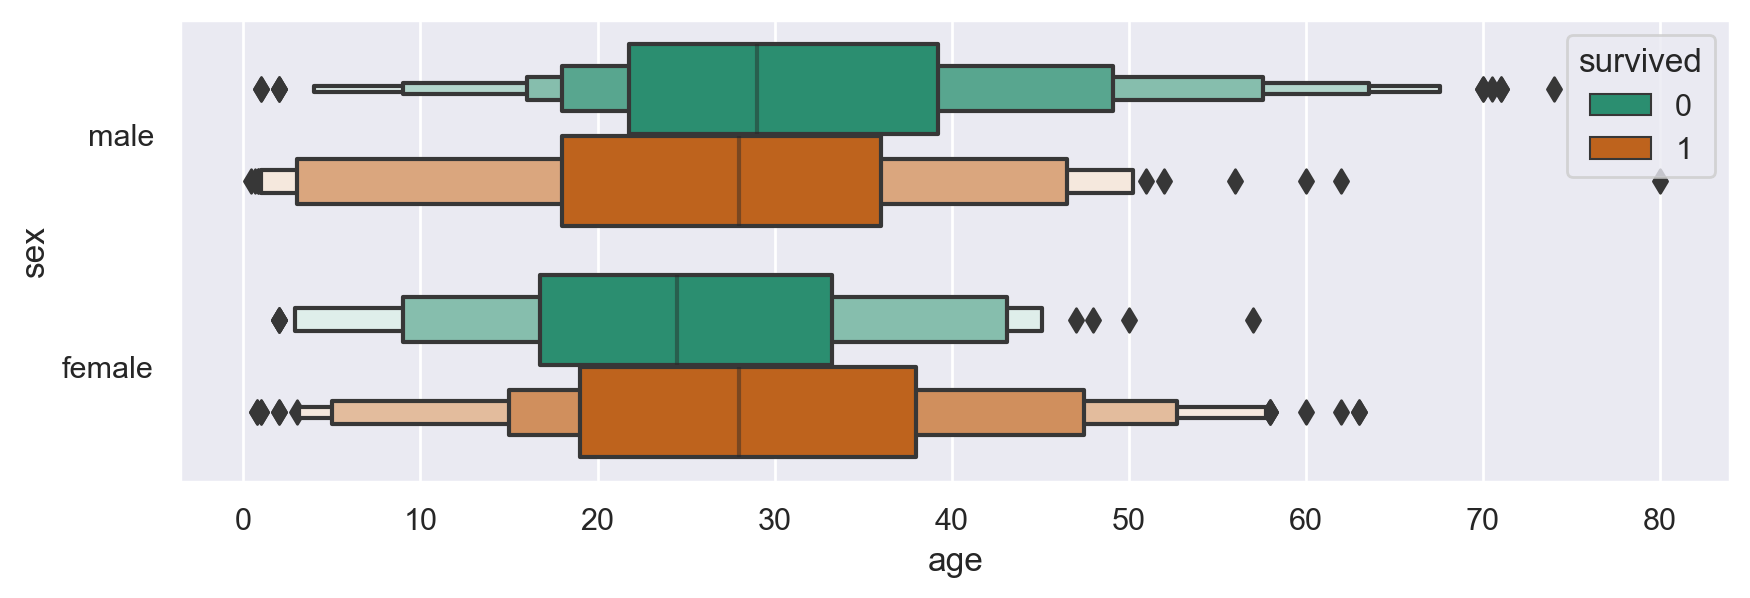

In [135]:
sns.boxenplot(data=titanic, y='sex', x='age', hue='survived')
plt.show()

### 3) 쌍관계 그래프
 - pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대한 산점도(scatterplot)와 히스토그램을 보여줌

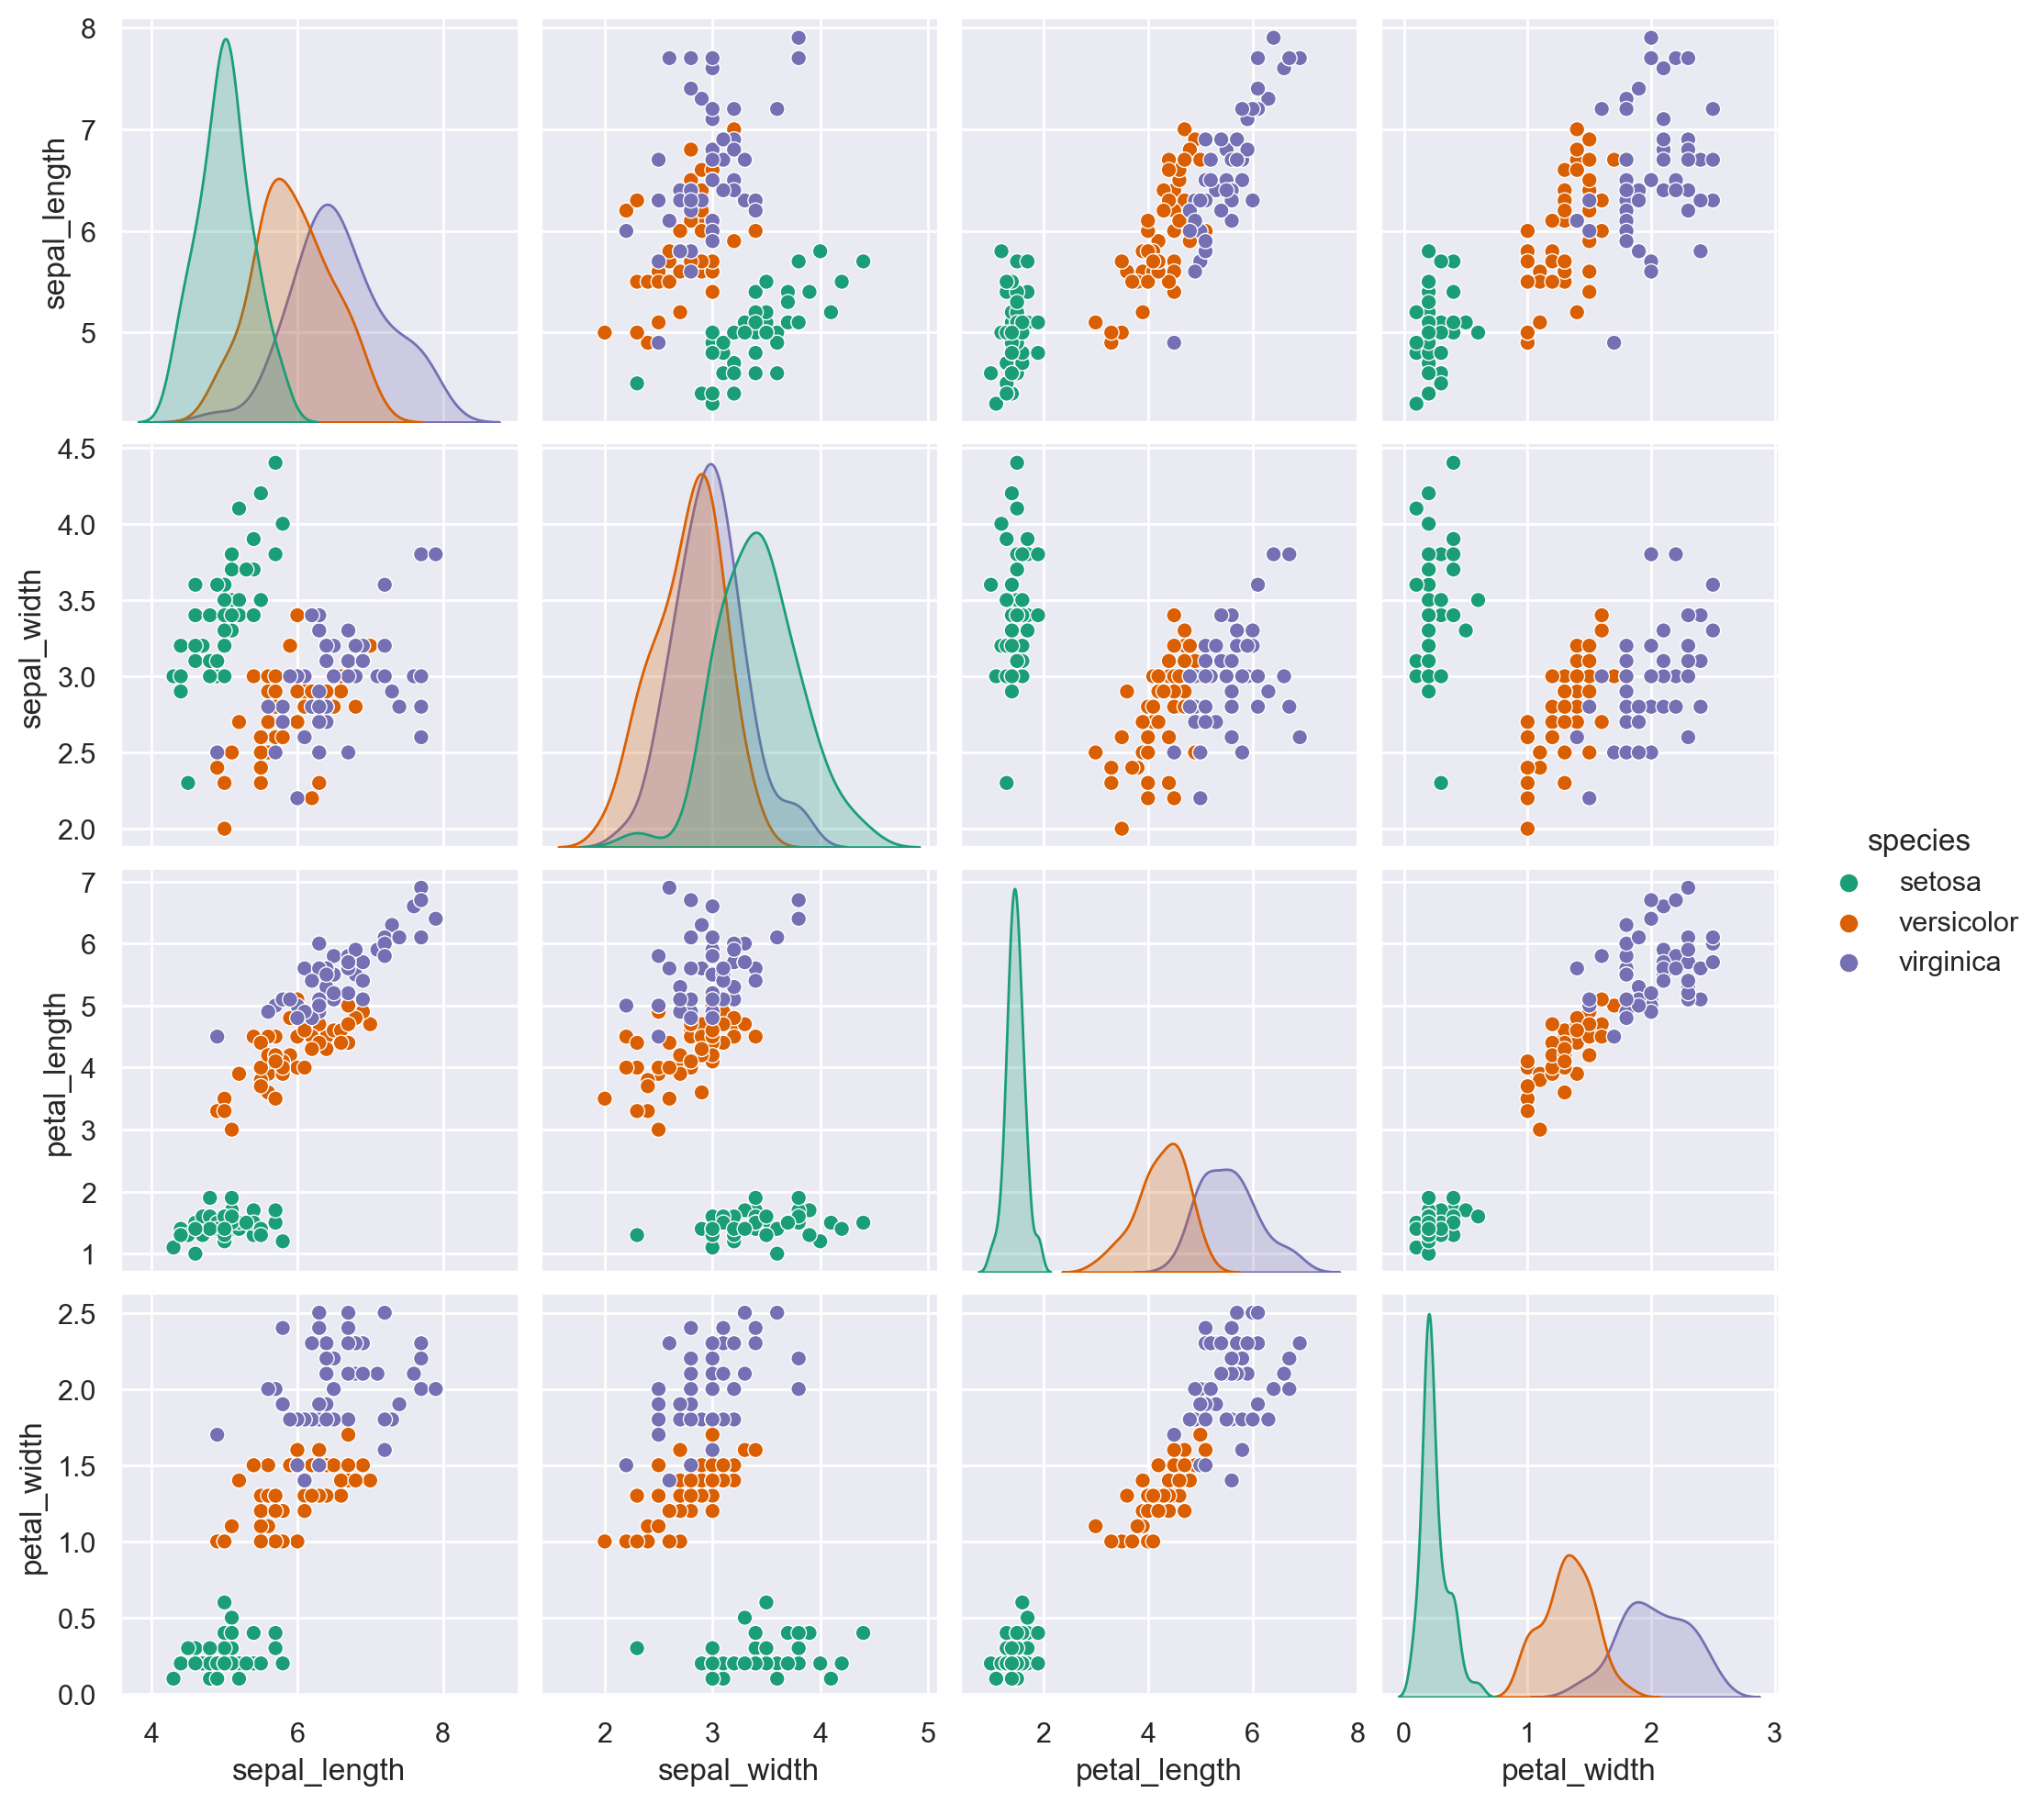

In [139]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도그래프

In [146]:
import numpy as np
x = np.random.randn(10000)  # 평균0, 표준편차1인 정규분포로 1000개 데이터를 배열로 생성

<Axes: ylabel='Count'>

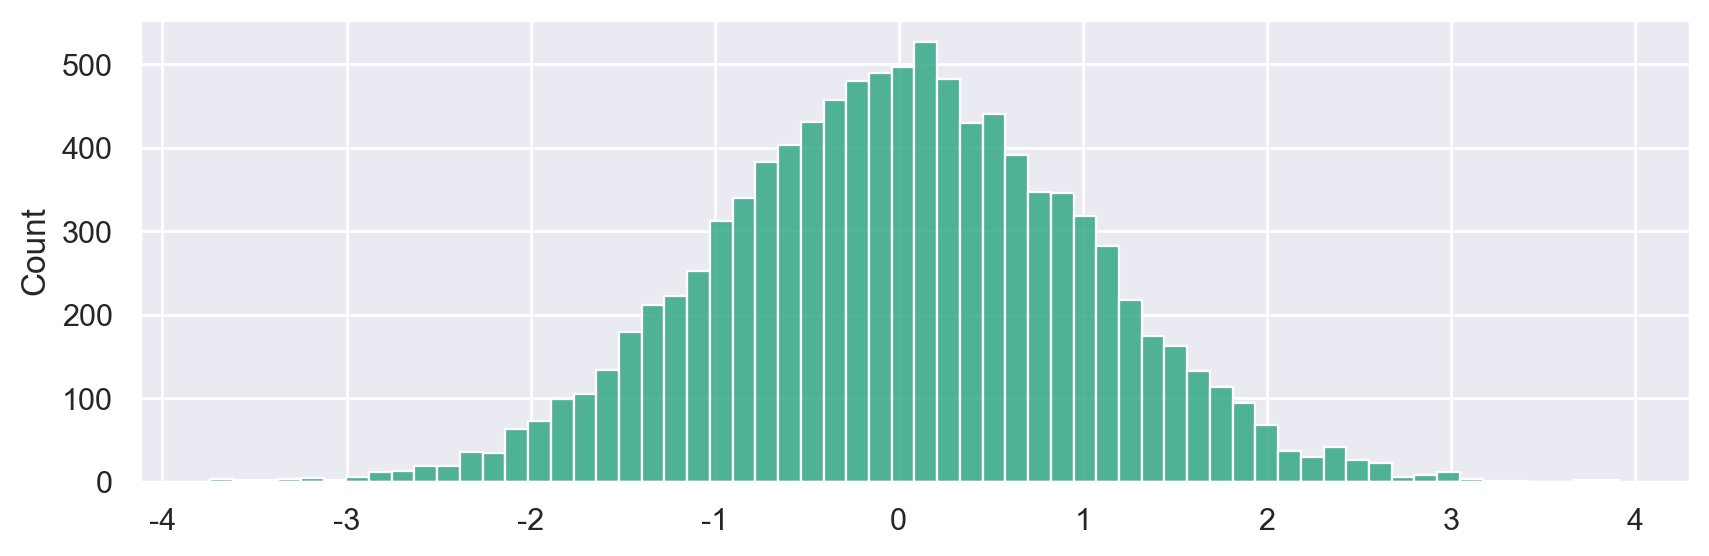

In [147]:
sns.histplot(x, kde=False)  # kde(Kernel Density estimation)=False : 분포를 매끄럽게

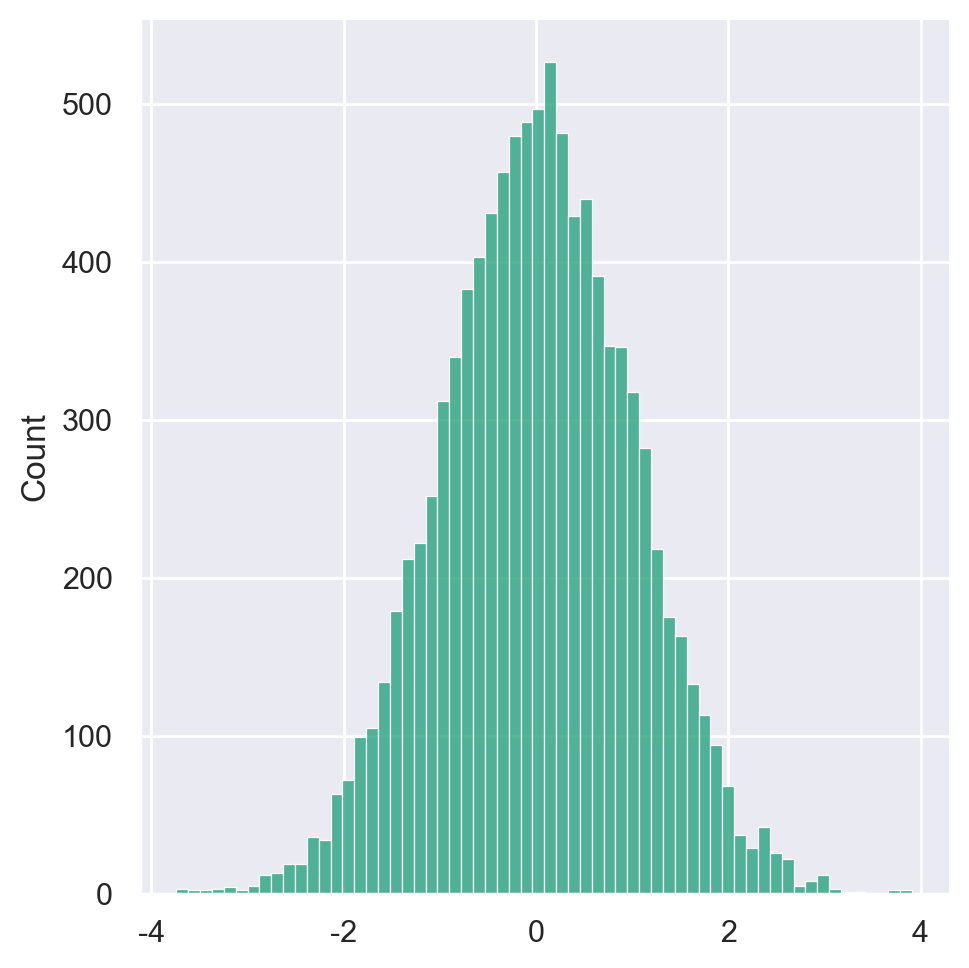

In [149]:
sns.displot(x)

### 5) 회귀 그래프

In [158]:
r = iris.corr(numeric_only=True)
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


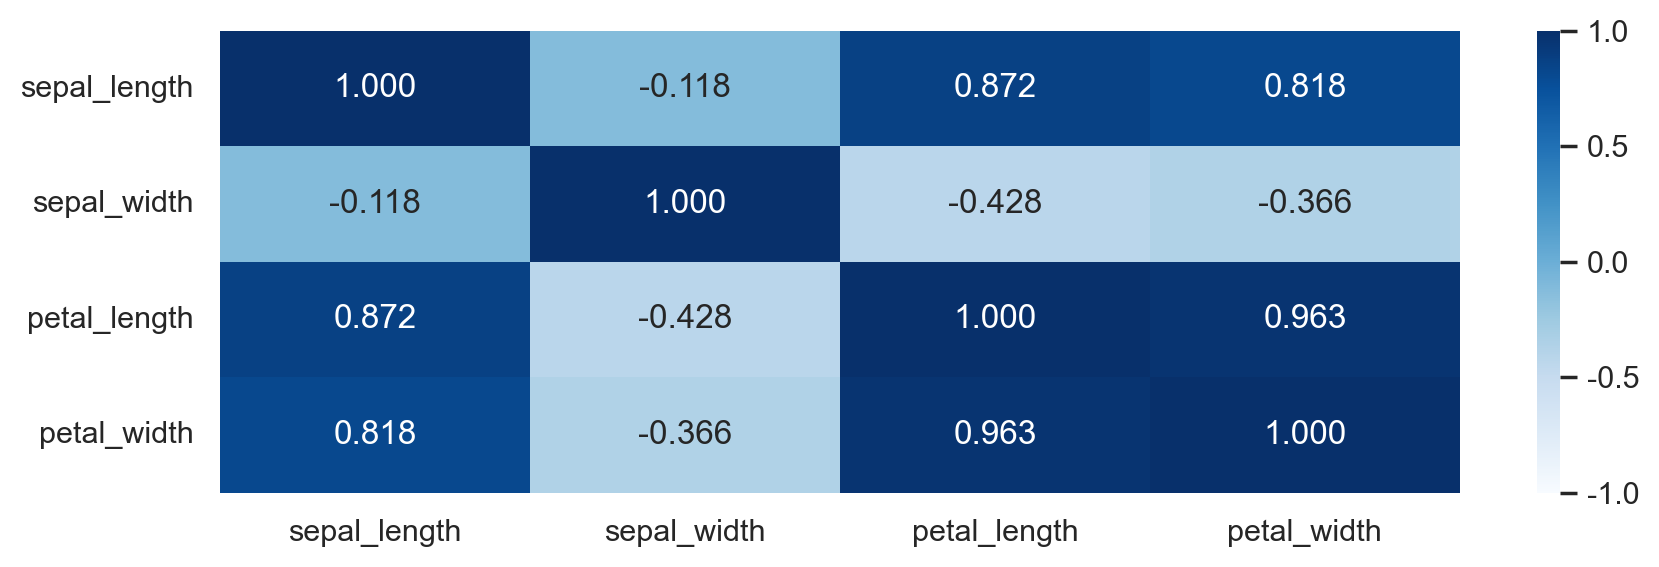

In [159]:
sns.heatmap(r, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Blues')
plt.show()

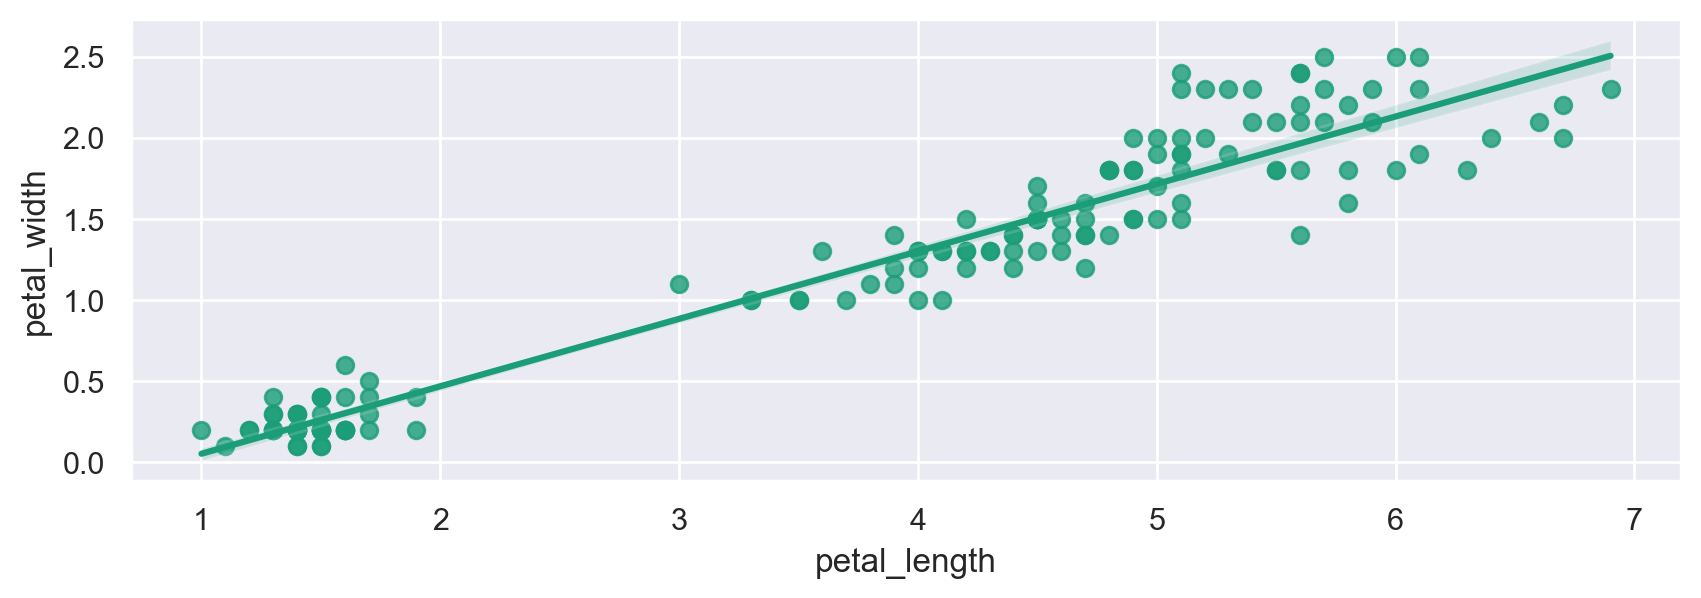

In [160]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplot(hue 사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

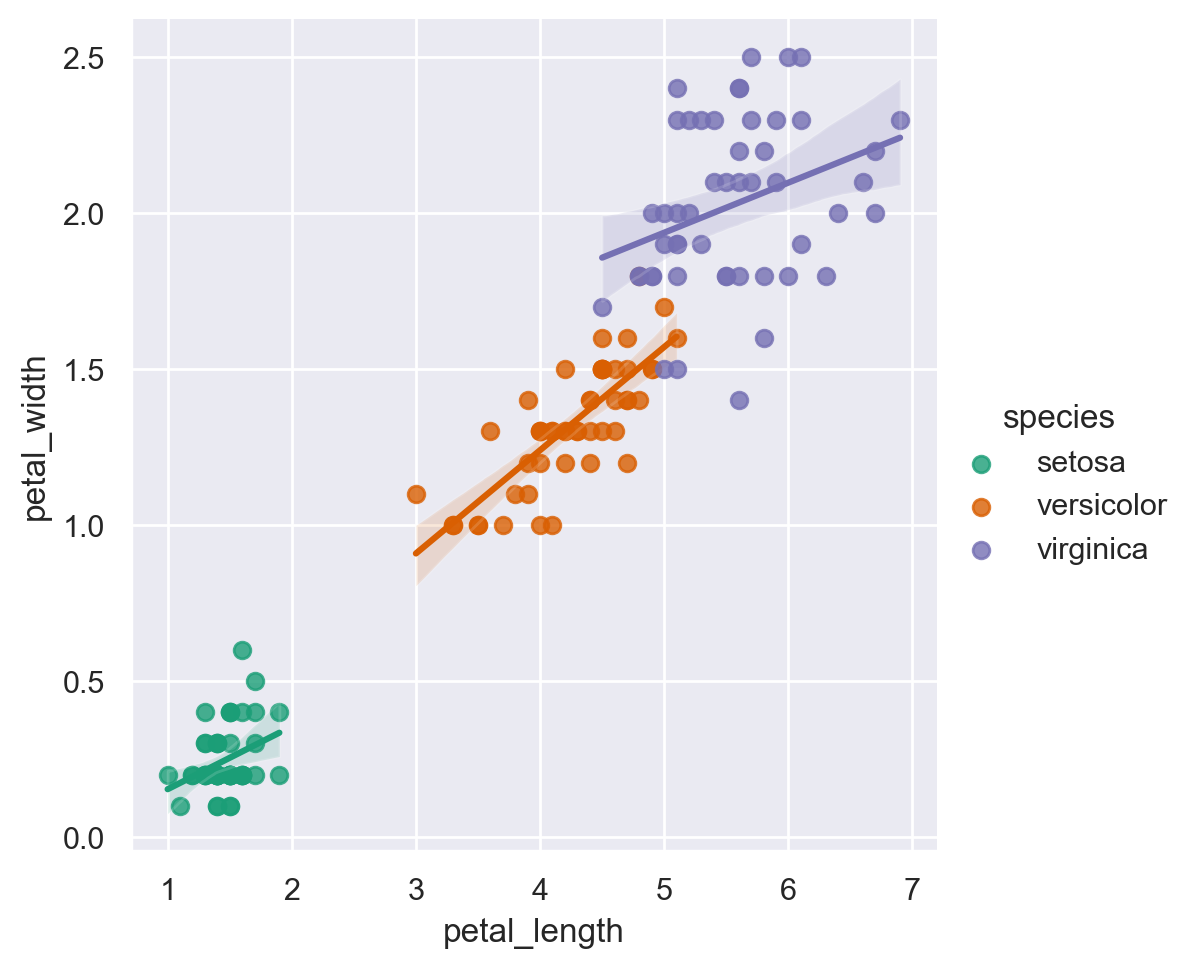

In [162]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

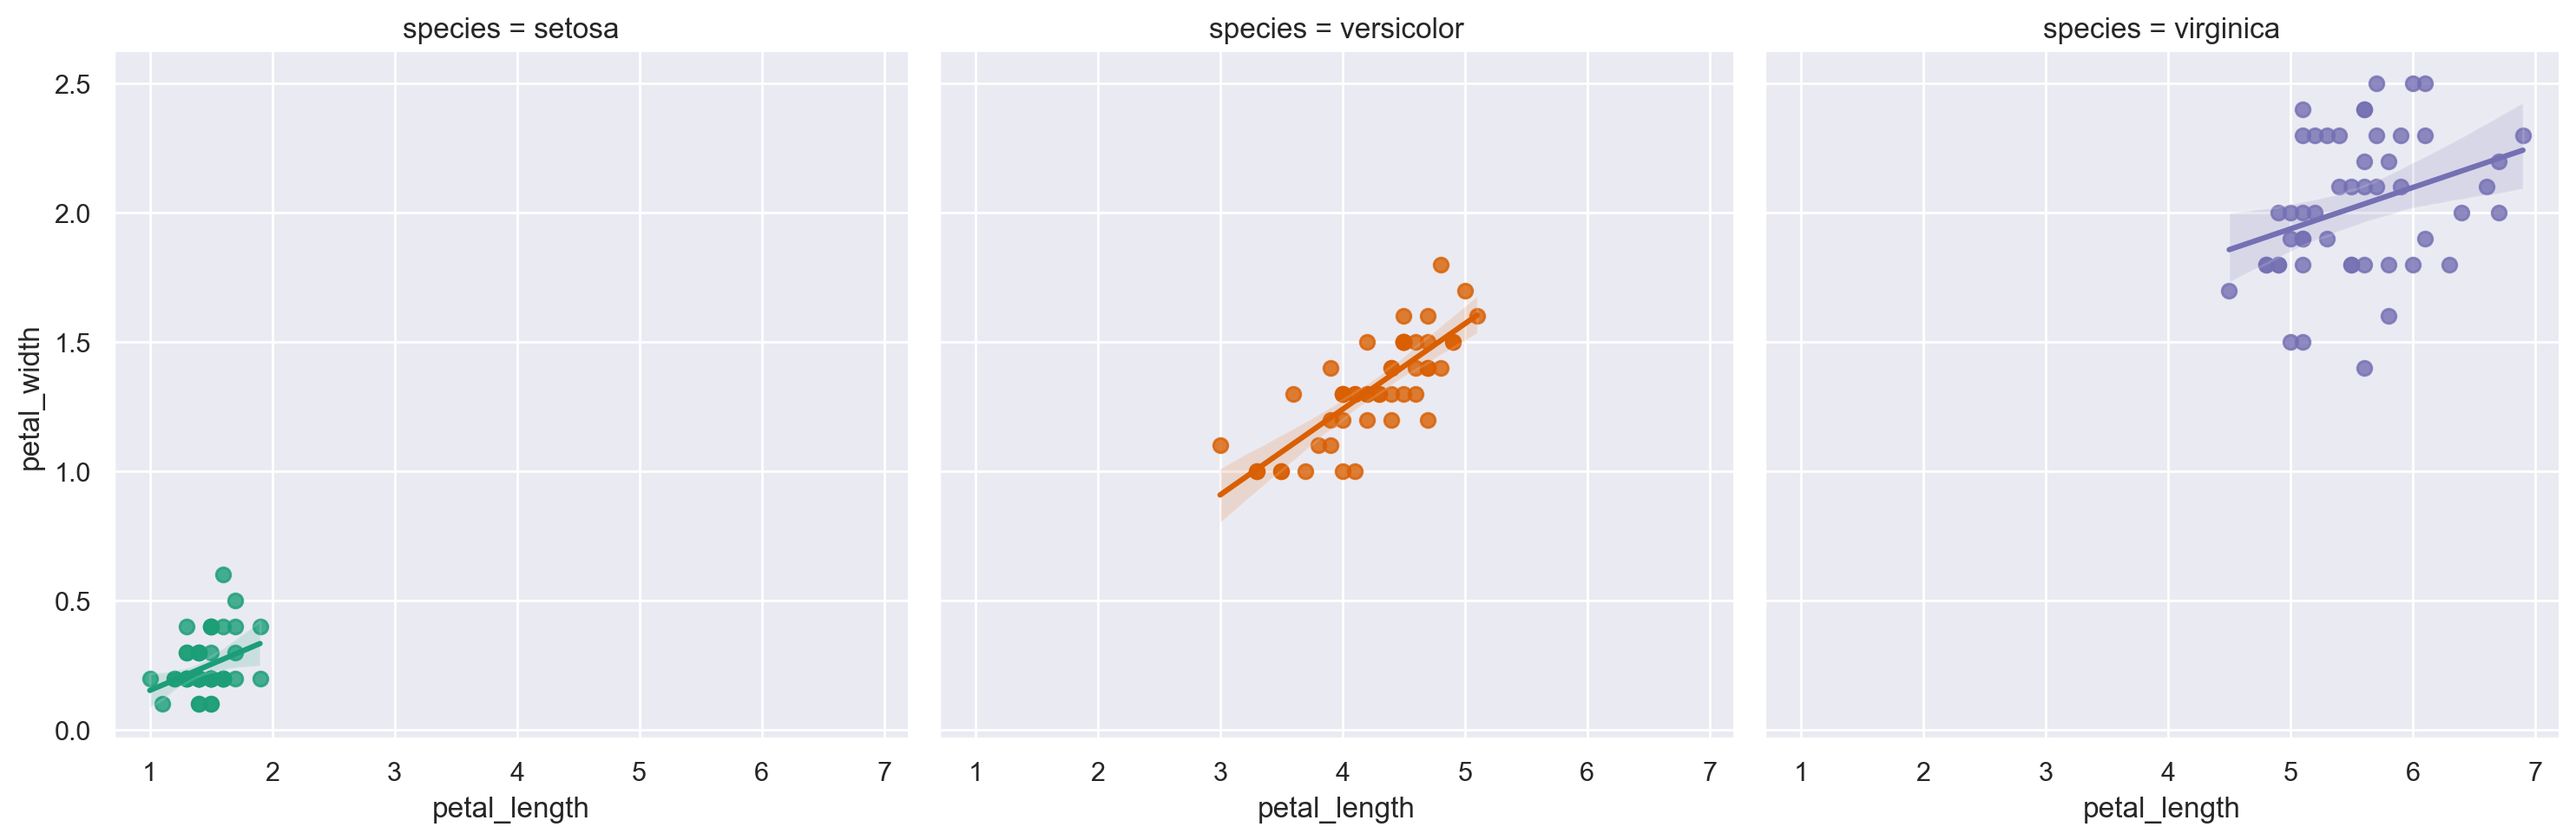

In [163]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', col='species')
plt.show()

## 3.4 다중 그래프를 위한 FacetGrid
https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

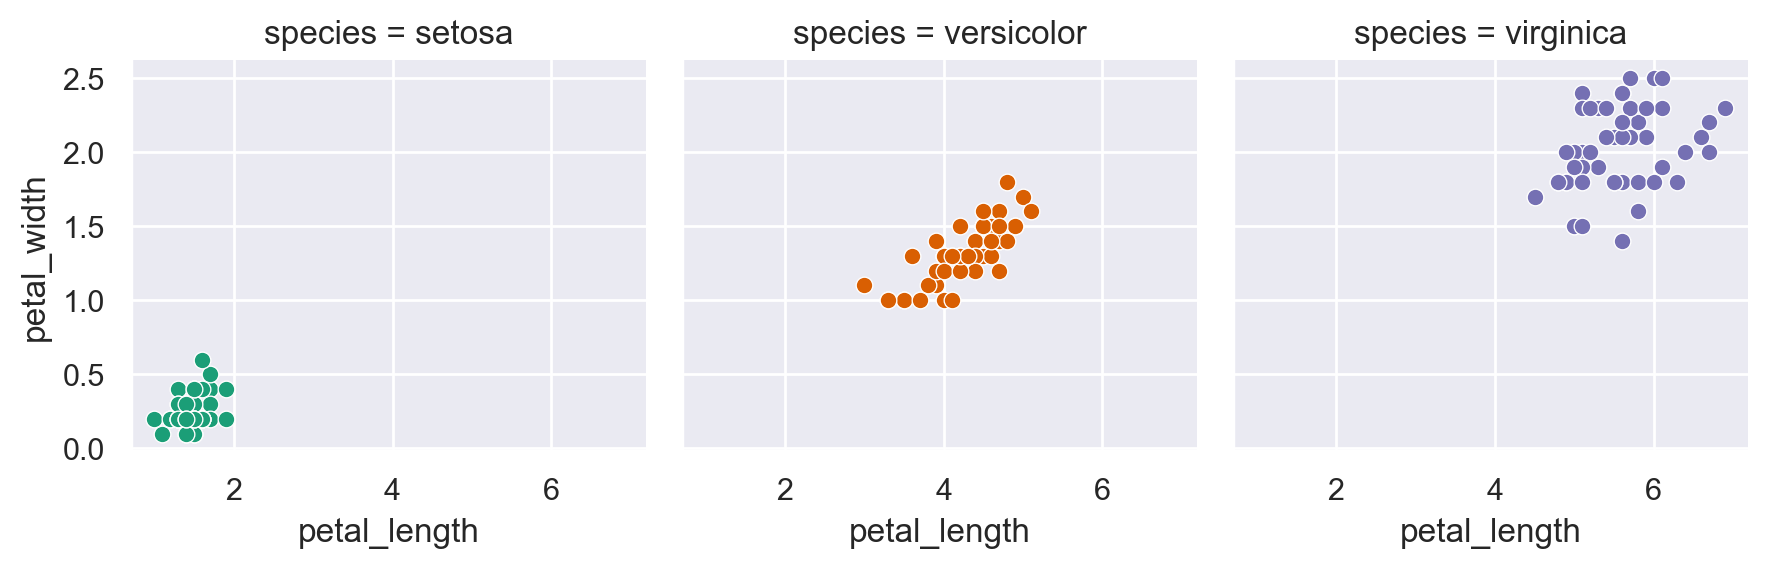

In [166]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.savefig('data/ch13.png')

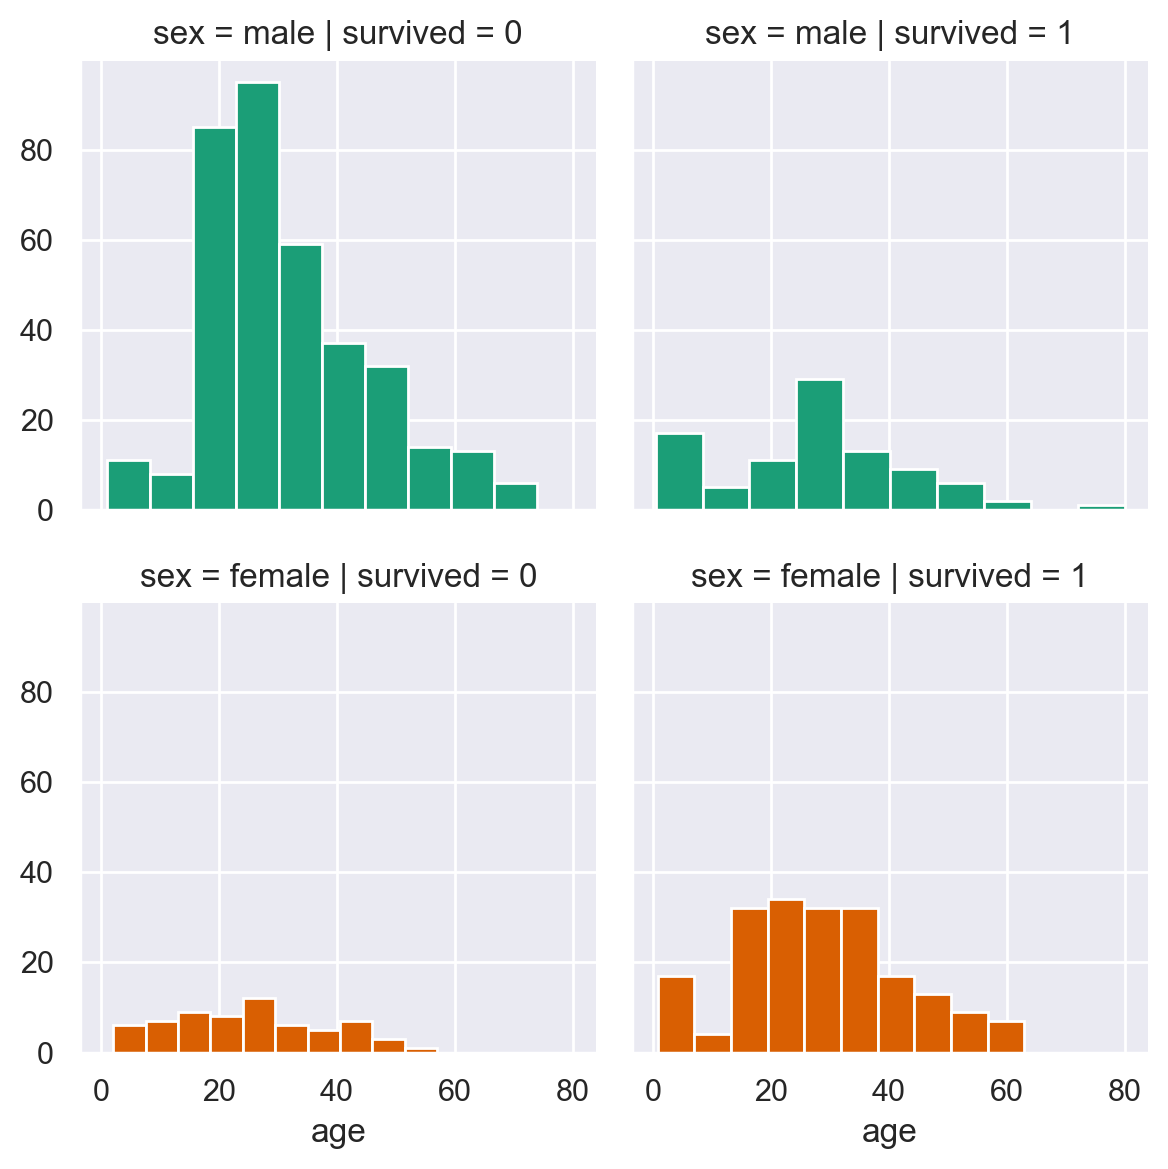

In [170]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(plt.hist, 'age')